## 1 - import necessary packages

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

# AD test
from arch.unitroot import ADF

# statsmodel used for time seriers test
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller 

training_file = '../智能制造训练集/train/inputs/training.csv'
testing_file = '../智能制造赛道测试集/test/testing.csv'

## 2 - loading data and define column names

In [2]:
# load training & testing file
training = pd.read_csv(training_file, low_memory=False)
testing = pd.read_csv(testing_file, low_memory=False)

numerical_features = ['oxygen_set_value', # '氧量设定值'
                      'primary_air_volume', # '一次风量'
                      'grate_manual_command',  #  '炉排手动指令'
                      'main_steam_flow_set_value', # '主蒸汽流量设定值'
                      'ejector_manual_command', #  '推料器手动指令'
                      'ejector_automatic_command', # '推料器自动指令'
                      'nox_content', # NOx含量
                      'grate_actual_operation_command', # 炉排实际运行指令
                      'secondary_air_control_door', # 二次风调门
                      'hcl_content', # HCL含量
                      'secondary_air_volume', # 二次风量
                      'water_flow', # 给水流量
                      'so2_content', # SO2含量
                      'drum_water_level', # 汽包水位
                      'induced_fan_speed', # 引风机转速
                      'co_content', # CO含量
                      'primary_damper'] # 一次风调门

categorical_features = ['ejector_automatic_switching_signal', # '推料器自动投退信号'
                        'grate_automatic_switching_signal', # '炉排自动投退信号'
                        'pusher_on_or_off', # 推料器启停
                        'grate_on_or_off'] # 炉排启停

label = ['main_steam_flow']

In [3]:
training.head()

datetime  oxygen_set_value  primary_air_volume  \
0  2021-12-20 00:00:00               5.5          72919.6563   
1  2021-12-20 00:00:01               5.5          73034.8047   
2  2021-12-20 00:00:02               5.5          73111.4609   
3  2021-12-20 00:00:03               5.5          73134.4375   
4  2021-12-20 00:00:04               5.5          73493.5625   

  ejector_automatic_switching_signal grate_automatic_switching_signal  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   

   grate_manual_command  main_steam_flow_set_value  ejector_manual_command  \
0               43.9083                       60.0                 53.9083   
1               44.0000                       60.0                 54.0000   
2               44.0452                       60.0                 54.0452   
3               44.0575                       60.0                 54.0575   
4               44.0699                       60.0                 54.0699   

   ejector_automatic_command  nox_content  ...  secondary_air_volume  \
0                    53.9094      57.4444  ...             4330.1270   
1                    54.0353      57.3889  ...             4898.9800   
2                    54.0476      57.5556  ...             4663.6895   
3                    54.0600      57.5370  ...             4898.9800   
4                    54.0724      57.3889  ...             4898.9800   

   water_flow  so2_content  pusher_on_or_off  drum_water_level  \
0     73.4054       2.6458               NaN            1.6872   
1     73.5788       2.5833               NaN            1.6107   
2     73.7589       2.6181               NaN            1.5039   
3     73.9473       2.6389               NaN            1.5284   
4     74.1118       2.6875               NaN            1.6921   

   induced_fan_speed grate_on_or_off  co_content  primary_damper  \
0            66.7986             NaN      1.6042         75.5532   
1            66.8056             NaN      1.5903         75.4144   
2            66.8195             NaN      1.6597         75.4051   
3            66.7894             NaN      1.6736         75.4537   
4            66.7662             NaN      1.6319         75.4144   

  main_steam_flow  
0         54.3032  
1         54.1495  
2         54.4899  
3         54.6693  
4         54.5034  

[5 rows x 23 columns]

In [4]:
training.tail()

datetime  oxygen_set_value  primary_air_volume  \
257393  2021-12-22 23:29:55              25.0          72750.4453   
257394  2021-12-22 23:29:56              25.0          72642.5703   
257395  2021-12-22 23:29:57              25.0          72248.2109   
257396  2021-12-22 23:29:58              25.0          72480.4453   
257397  2021-12-22 23:29:59              25.0          72773.5469   

       ejector_automatic_switching_signal grate_automatic_switching_signal  \
257393                              False                            False   
257394                              False                            False   
257395                              False                            False   
257396                              False                            False   
257397                              False                            False   

        grate_manual_command  main_steam_flow_set_value  \
257393                  50.0                       60.0   
257394                  50.0                       60.0   
257395                  50.0                       60.0   
257396                  50.0                       60.0   
257397                  50.0                       60.0   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
257393                    40.0                       70.0     111.6481  ...   
257394                    40.0                       70.0     111.5926  ...   
257395                    40.0                       70.0     111.7037  ...   
257396                    40.0                       70.0     111.5555  ...   
257397                    40.0                       70.0     111.5555  ...   

        secondary_air_volume  water_flow  so2_content  pusher_on_or_off  \
257393            18533.7520     68.6269       2.7917             False   
257394            18553.9766     68.6118       3.2569             False   
257395            18674.8496     68.6104       3.2500             False   
257396            18614.5098     68.6183       3.3194             False   
257397            18553.9766     68.6189       3.2153             False   

        drum_water_level  induced_fan_speed grate_on_or_off  co_content  \
257393            7.9178            67.4097           False      2.3056   
257394            7.8261            67.4375           False      2.5417   
257395            7.7172            67.4444           False      2.5208   
257396            7.6045            67.4560           False      2.4792   
257397            7.5527            67.4259           False      2.4583   

        primary_damper main_steam_flow  
257393         65.5370         57.7807  
257394         65.5370         57.7987  
257395         65.5370         57.7698  
257396         65.5532         57.7407  
257397         65.5602         58.0246  

[5 rows x 23 columns]

In [5]:
testing.head()

datetime  oxygen_set_value  primary_air_volume  \
0  2021-12-22 23:30:00              25.0          72881.2344   
1  2021-12-22 23:30:01              25.0          73729.4688   
2  2021-12-22 23:30:02              25.0          74221.6875   
3  2021-12-22 23:30:03              25.0          73600.1953   
4  2021-12-22 23:30:04              25.0          73057.8047   

   ejector_automatic_switching_signal  grate_automatic_switching_signal  \
0                               False                             False   
1                               False                             False   
2                               False                             False   
3                               False                             False   
4                               False                             False   

   grate_manual_command  main_steam_flow_set_value  ejector_manual_command  \
0                  50.0                       60.0                    40.0   
1                  50.0                       60.0                    40.0   
2                  50.0                       60.0                    40.0   
3                  50.0                       60.0                    40.0   
4                  50.0                       60.0                    40.0   

   ejector_automatic_command  nox_content  ...  hcl_content  \
0                       70.0     111.4074  ...       2.8333   
1                       70.0     111.4074  ...       2.8194   
2                       70.0     111.4630  ...       2.7593   
3                       70.0     109.3333  ...       2.5093   
4                       70.0     109.2593  ...       2.5046   

   secondary_air_volume  water_flow  so2_content  pusher_on_or_off  \
0            18553.9766     68.6522       3.2569             False   
1            18472.9531     68.6643       3.2778             False   
2            18553.9766     68.6404       3.3194             False   
3            18553.9766     68.6220       2.8958             False   
4            18614.5098     68.6118       2.8333             False   

   drum_water_level  induced_fan_speed  grate_on_or_off  co_content  \
0            7.5292            67.4120            False      2.5278   
1            7.4884            67.4167            False      2.5208   
2            7.4432            67.4468            False      2.5625   
3            7.4716            67.4306            False      1.0347   
4            7.5600            67.4468            False      0.9722   

   primary_damper  
0         65.5370  
1         65.5532  
2         65.5463  
3         65.5231  
4         65.5463  

[5 rows x 22 columns]

In [6]:
training[numerical_features].head()

oxygen_set_value  primary_air_volume  grate_manual_command  \
0               5.5          72919.6563               43.9083   
1               5.5          73034.8047               44.0000   
2               5.5          73111.4609               44.0452   
3               5.5          73134.4375               44.0575   
4               5.5          73493.5625               44.0699   

   main_steam_flow_set_value  ejector_manual_command  \
0                       60.0                 53.9083   
1                       60.0                 54.0000   
2                       60.0                 54.0452   
3                       60.0                 54.0575   
4                       60.0                 54.0699   

   ejector_automatic_command  nox_content  grate_actual_operation_command  \
0                    53.9094      57.4444                         43.9078   
1                    54.0353      57.3889                         43.9126   
2                    54.0476      57.5556                         44.0439   
3                    54.0600      57.5370                         44.0551   
4                    54.0724      57.3889                         44.0674   

   secondary_air_control_door  hcl_content  secondary_air_volume  water_flow  \
0                     20.4653       6.1991             4330.1270     73.4054   
1                     20.5810       6.2315             4898.9800     73.5788   
2                     20.6806       6.2176             4663.6895     73.7589   
3                     20.6991       6.2083             4898.9800     73.9473   
4                     20.8542       6.1991             4898.9800     74.1118   

   so2_content  drum_water_level  induced_fan_speed  co_content  \
0       2.6458            1.6872            66.7986      1.6042   
1       2.5833            1.6107            66.8056      1.5903   
2       2.6181            1.5039            66.8195      1.6597   
3       2.6389            1.5284            66.7894      1.6736   
4       2.6875            1.6921            66.7662      1.6319   

   primary_damper  
0         75.5532  
1         75.4144  
2         75.4051  
3         75.4537  
4         75.4144

## 3 - handle missing data points

In [7]:
# handle missing data in the training dataset
# generate a dataframe cover the whole period
full_date_range = pd.date_range(start='2021-12-20 00:00:00', end='2021-12-22 23:29:59', freq='S')
full_df = pd.DataFrame(data={'datetime': full_date_range})
full_df.head()

datetime
0 2021-12-20 00:00:00
1 2021-12-20 00:00:01
2 2021-12-20 00:00:02
3 2021-12-20 00:00:03
4 2021-12-20 00:00:04

In [8]:
full_df.tail()

datetime
257395 2021-12-22 23:29:55
257396 2021-12-22 23:29:56
257397 2021-12-22 23:29:57
257398 2021-12-22 23:29:58
257399 2021-12-22 23:29:59

In [9]:
# convert column datetime to datetime64 object
training['datetime'] = pd.to_datetime(training['datetime'], format='%Y-%m-%d %X')
# join with training dataset
training = pd.merge(full_df, training, on=['datetime'], how='left')

training.head()

datetime  oxygen_set_value  primary_air_volume  \
0 2021-12-20 00:00:00               5.5          72919.6563   
1 2021-12-20 00:00:01               5.5          73034.8047   
2 2021-12-20 00:00:02               5.5          73111.4609   
3 2021-12-20 00:00:03               5.5          73134.4375   
4 2021-12-20 00:00:04               5.5          73493.5625   

  ejector_automatic_switching_signal grate_automatic_switching_signal  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   

   grate_manual_command  main_steam_flow_set_value  ejector_manual_command  \
0               43.9083                       60.0                 53.9083   
1               44.0000                       60.0                 54.0000   
2               44.0452                       60.0                 54.0452   
3               44.0575                       60.0                 54.0575   
4               44.0699                       60.0                 54.0699   

   ejector_automatic_command  nox_content  ...  secondary_air_volume  \
0                    53.9094      57.4444  ...             4330.1270   
1                    54.0353      57.3889  ...             4898.9800   
2                    54.0476      57.5556  ...             4663.6895   
3                    54.0600      57.5370  ...             4898.9800   
4                    54.0724      57.3889  ...             4898.9800   

   water_flow  so2_content  pusher_on_or_off  drum_water_level  \
0     73.4054       2.6458               NaN            1.6872   
1     73.5788       2.5833               NaN            1.6107   
2     73.7589       2.6181               NaN            1.5039   
3     73.9473       2.6389               NaN            1.5284   
4     74.1118       2.6875               NaN            1.6921   

   induced_fan_speed grate_on_or_off  co_content  primary_damper  \
0            66.7986             NaN      1.6042         75.5532   
1            66.8056             NaN      1.5903         75.4144   
2            66.8195             NaN      1.6597         75.4051   
3            66.7894             NaN      1.6736         75.4537   
4            66.7662             NaN      1.6319         75.4144   

  main_steam_flow  
0         54.3032  
1         54.1495  
2         54.4899  
3         54.6693  
4         54.5034  

[5 rows x 23 columns]

In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257400 entries, 0 to 257399
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   datetime                            257400 non-null  datetime64[ns]
 1   oxygen_set_value                    257398 non-null  float64       
 2   primary_air_volume                  257398 non-null  float64       
 3   ejector_automatic_switching_signal  257382 non-null  object        
 4   grate_automatic_switching_signal    257382 non-null  object        
 5   grate_manual_command                257398 non-null  float64       
 6   main_steam_flow_set_value           257398 non-null  float64       
 7   ejector_manual_command              257398 non-null  float64       
 8   ejector_automatic_command           257398 non-null  float64       
 9   nox_content                         257398 non-null  float64       
 10  grate_ac

In [11]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   datetime                            1800 non-null   object 
 1   oxygen_set_value                    1800 non-null   float64
 2   primary_air_volume                  1800 non-null   float64
 3   ejector_automatic_switching_signal  1800 non-null   bool   
 4   grate_automatic_switching_signal    1800 non-null   bool   
 5   grate_manual_command                1800 non-null   float64
 6   main_steam_flow_set_value           1800 non-null   float64
 7   ejector_manual_command              1800 non-null   float64
 8   ejector_automatic_command           1800 non-null   float64
 9   nox_content                         1800 non-null   float64
 10  grate_actual_operation_command      1800 non-null   float64
 11  secondary_air_control_door          1800 no

## 4.1 handle na for numerical values

In [12]:
training[(training['datetime'] >= '2021-12-21 10:31:05') & (training['datetime'] <= '2021-12-21 10:31:10')]

datetime  oxygen_set_value  primary_air_volume  \
124265 2021-12-21 10:31:05               5.5          95480.0938   
124266 2021-12-21 10:31:06               5.5          95480.0938   
124267 2021-12-21 10:31:07               NaN                 NaN   
124268 2021-12-21 10:31:08               NaN                 NaN   
124269 2021-12-21 10:31:09               5.5          95480.0938   
124270 2021-12-21 10:31:10               5.5          95480.0938   

       ejector_automatic_switching_signal grate_automatic_switching_signal  \
124265                               True                             True   
124266                               True                             True   
124267                                NaN                              NaN   
124268                                NaN                              NaN   
124269                               True                             True   
124270                               True                             True   

        grate_manual_command  main_steam_flow_set_value  \
124265               34.5271                       62.5   
124266               34.5271                       62.5   
124267                   NaN                        NaN   
124268                   NaN                        NaN   
124269               34.5271                       62.5   
124270               34.5271                       62.5   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
124265                 59.5271                    59.5278      66.8333  ...   
124266                 59.5271                    59.5278      66.8333  ...   
124267                     NaN                        NaN          NaN  ...   
124268                     NaN                        NaN          NaN  ...   
124269                 59.5271                    59.5278      66.8333  ...   
124270                 59.5271                    59.5278      66.8333  ...   

        secondary_air_volume  water_flow  so2_content  pusher_on_or_off  \
124265              4330.127     71.0749       4.8958             False   
124266              4330.127     71.0749       4.8958             False   
124267                   NaN         NaN          NaN               NaN   
124268                   NaN         NaN          NaN               NaN   
124269              4330.127     71.0749       4.8958             False   
124270              4330.127     71.0749       4.8958             False   

        drum_water_level  induced_fan_speed grate_on_or_off  co_content  \
124265             5.514            79.6667           False      2.4306   
124266             5.514            79.6667           False      2.4306   
124267               NaN                NaN             NaN         NaN   
124268               NaN                NaN             NaN         NaN   
124269             5.514            79.6667           False      2.4306   
124270             5.514            79.6667           False      2.4306   

        primary_damper main_steam_flow  
124265            83.5         57.0908  
124266            83.5         57.0908  
124267             NaN             NaN  
124268             NaN             NaN  
124269            83.5         57.0908  
124270            83.5         57.0908  

[6 rows x 23 columns]

In [13]:
training[numerical_features + label] = training[numerical_features + label].fillna(method='ffill')

In [14]:
training[(training['datetime'] >= '2021-12-21 10:31:05') & (training['datetime'] <= '2021-12-21 10:31:10')]

datetime  oxygen_set_value  primary_air_volume  \
124265 2021-12-21 10:31:05               5.5          95480.0938   
124266 2021-12-21 10:31:06               5.5          95480.0938   
124267 2021-12-21 10:31:07               5.5          95480.0938   
124268 2021-12-21 10:31:08               5.5          95480.0938   
124269 2021-12-21 10:31:09               5.5          95480.0938   
124270 2021-12-21 10:31:10               5.5          95480.0938   

       ejector_automatic_switching_signal grate_automatic_switching_signal  \
124265                               True                             True   
124266                               True                             True   
124267                                NaN                              NaN   
124268                                NaN                              NaN   
124269                               True                             True   
124270                               True                             True   

        grate_manual_command  main_steam_flow_set_value  \
124265               34.5271                       62.5   
124266               34.5271                       62.5   
124267               34.5271                       62.5   
124268               34.5271                       62.5   
124269               34.5271                       62.5   
124270               34.5271                       62.5   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
124265                 59.5271                    59.5278      66.8333  ...   
124266                 59.5271                    59.5278      66.8333  ...   
124267                 59.5271                    59.5278      66.8333  ...   
124268                 59.5271                    59.5278      66.8333  ...   
124269                 59.5271                    59.5278      66.8333  ...   
124270                 59.5271                    59.5278      66.8333  ...   

        secondary_air_volume  water_flow  so2_content  pusher_on_or_off  \
124265              4330.127     71.0749       4.8958             False   
124266              4330.127     71.0749       4.8958             False   
124267              4330.127     71.0749       4.8958               NaN   
124268              4330.127     71.0749       4.8958               NaN   
124269              4330.127     71.0749       4.8958             False   
124270              4330.127     71.0749       4.8958             False   

        drum_water_level  induced_fan_speed grate_on_or_off  co_content  \
124265             5.514            79.6667           False      2.4306   
124266             5.514            79.6667           False      2.4306   
124267             5.514            79.6667             NaN      2.4306   
124268             5.514            79.6667             NaN      2.4306   
124269             5.514            79.6667           False      2.4306   
124270             5.514            79.6667           False      2.4306   

        primary_damper main_steam_flow  
124265            83.5         57.0908  
124266            83.5         57.0908  
124267            83.5         57.0908  
124268            83.5         57.0908  
124269            83.5         57.0908  
124270            83.5         57.0908  

[6 rows x 23 columns]

In [15]:
training[training['oxygen_set_value'].isna()]

Empty DataFrame
Columns: [datetime, oxygen_set_value, primary_air_volume, ejector_automatic_switching_signal, grate_automatic_switching_signal, grate_manual_command, main_steam_flow_set_value, ejector_manual_command, ejector_automatic_command, nox_content, grate_actual_operation_command, secondary_air_control_door, hcl_content, secondary_air_volume, water_flow, so2_content, pusher_on_or_off, drum_water_level, induced_fan_speed, grate_on_or_off, co_content, primary_damper, main_steam_flow]
Index: []

[0 rows x 23 columns]

## 4.2 - handle na for categorical columns

In [16]:
training[categorical_features].head()

ejector_automatic_switching_signal grate_automatic_switching_signal  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   

  pusher_on_or_off grate_on_or_off  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN

In [17]:
training[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257400 entries, 0 to 257399
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ejector_automatic_switching_signal  257382 non-null  object
 1   grate_automatic_switching_signal    257382 non-null  object
 2   pusher_on_or_off                    257382 non-null  object
 3   grate_on_or_off                     257382 non-null  object
dtypes: object(4)
memory usage: 9.8+ MB


In [18]:
training['ejector_automatic_switching_signal'].value_counts()

True     138080
False    119302
Name: ejector_automatic_switching_signal, dtype: int64

In [19]:
training.loc[(training['datetime'] <= '2021-12-22 00:00:10') & (training['datetime'] >= '2021-12-21 23:59:55')]

datetime  oxygen_set_value  primary_air_volume  \
172795 2021-12-21 23:59:55               6.0          66084.8047   
172796 2021-12-21 23:59:56               6.0          65540.0547   
172797 2021-12-21 23:59:57               6.0          64947.6133   
172798 2021-12-21 23:59:58               6.0          65445.9648   
172799 2021-12-21 23:59:59               6.0          65676.6641   
172800 2021-12-22 00:00:00               6.0          65042.4258   
172801 2021-12-22 00:00:01               6.0          64419.3359   
172802 2021-12-22 00:00:02               6.0          64800.8242   
172803 2021-12-22 00:00:03               6.0          66169.5234   
172804 2021-12-22 00:00:04               6.0          66389.2734   
172805 2021-12-22 00:00:05               6.0          66363.9531   
172806 2021-12-22 00:00:06               6.0          65821.5078   
172807 2021-12-22 00:00:07               6.0          65821.5078   
172808 2021-12-22 00:00:08               6.0          65761.9063   
172809 2021-12-22 00:00:09               6.0          66330.1797   
172810 2021-12-22 00:00:10               6.0          66616.7031   

       ejector_automatic_switching_signal grate_automatic_switching_signal  \
172795                               True                             True   
172796                               True                             True   
172797                               True                             True   
172798                               True                             True   
172799                               True                             True   
172800                               True                             True   
172801                                NaN                              NaN   
172802                                NaN                              NaN   
172803                                NaN                              NaN   
172804                                NaN                              NaN   
172805                                NaN                              NaN   
172806                               True                             True   
172807                               True                             True   
172808                               True                             True   
172809                               True                             True   
172810                               True                             True   

        grate_manual_command  main_steam_flow_set_value  \
172795                  60.0                       60.0   
172796                  60.0                       60.0   
172797                  60.0                       60.0   
172798                  60.0                       60.0   
172799                  60.0                       60.0   
172800                  60.0                       60.0   
172801                  60.0                       60.0   
172802                  60.0                       60.0   
172803                  60.0                       60.0   
172804                  60.0                       60.0   
172805                  60.0                       60.0   
172806                  60.0                       60.0   
172807                  60.0                       60.0   
172808                  60.0                       60.0   
172809                  60.0                       60.0   
172810                  60.0                       60.0   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
172795                    60.0                       60.0      55.9259  ...   
172796                    60.0                       60.0      55.7222  ...   
172797                    60.0                       60.0      55.6852  ...   
172798                    60.0                       60.0      56.4815  ...   
172799                    60.0                       60.0      56.3148  ...   
172800                    60.0                       60.

In [20]:
# fill NA values using backfill func
training[categorical_features] = training[categorical_features].fillna(method='backfill')
training[categorical_features] = training[categorical_features].fillna(method='ffill')

In [21]:
# after filling
training.head(10)

datetime  oxygen_set_value  primary_air_volume  \
0 2021-12-20 00:00:00               5.5          72919.6563   
1 2021-12-20 00:00:01               5.5          73034.8047   
2 2021-12-20 00:00:02               5.5          73111.4609   
3 2021-12-20 00:00:03               5.5          73134.4375   
4 2021-12-20 00:00:04               5.5          73493.5625   
5 2021-12-20 00:00:05               5.5          72927.3359   
6 2021-12-20 00:00:06               5.5          72565.4141   
7 2021-12-20 00:00:07               5.5          71991.8828   
8 2021-12-20 00:00:08               5.5          71781.4844   
9 2021-12-20 00:00:09               5.5          72240.4453   

   ejector_automatic_switching_signal  grate_automatic_switching_signal  \
0                                True                              True   
1                                True                              True   
2                                True                              True   
3                                True                              True   
4                                True                              True   
5                                True                              True   
6                                True                              True   
7                                True                              True   
8                                True                              True   
9                                True                              True   

   grate_manual_command  main_steam_flow_set_value  ejector_manual_command  \
0               43.9083                       60.0                 53.9083   
1               44.0000                       60.0                 54.0000   
2               44.0452                       60.0                 54.0452   
3               44.0575                       60.0                 54.0575   
4               44.0699                       60.0                 54.0699   
5               44.0823                       60.0                 54.0823   
6               44.0946                       60.0                 54.0946   
7               44.0435                       60.0                 54.0435   
8               44.0453                       60.0                 54.0453   
9               44.0535                       60.0                 54.0535   

   ejector_automatic_command  nox_content  ...  secondary_air_volume  \
0                    53.9094      57.4444  ...             4330.1270   
1                    54.0353      57.3889  ...             4898.9800   
2                    54.0476      57.5556  ...             4663.6895   
3                    54.0600      57.5370  ...             4898.9800   
4                    54.0724      57.3889  ...             4898.9800   
5                    54.0847      56.9259  ...             4898.9800   
6                    54.0971      57.0556  ...             4898.9800   
7                    54.0387      57.1111  ...             4898.9800   
8                    54.0469      56.9444  ...             4898.9800   
9                    54.0552      56.7593  ...             5123.4751   

   water_flow  so2_content  pusher_on_or_off  drum_water_level  \
0     73.4054       2.6458              True            1.6872   
1     73.5788       2.5833              True            1.6107   
2     73.7589       2.6181              True            1.5039   
3     73.9473       2.6389              True            1.5284   
4     74.1118       2.6875              True            1.6921   
5     74.2273       2.8958              True            1.7617   
6     74.3151       2.8819              True            1.8370   
7     74.3242       2.8542              True            1.9551   
8     74.2533       2.8472              True            2.0904   
9     74.2104       2.9236              True            2.2391   

   induced_fan_speed  grate_on_or_off  co_content  primary_damper  \
0            66.7986             True      1.

In [22]:
training.loc[(training['datetime'] <= '2021-12-22 00:00:10') & (training['datetime'] >= '2021-12-21 23:59:55')]

datetime  oxygen_set_value  primary_air_volume  \
172795 2021-12-21 23:59:55               6.0          66084.8047   
172796 2021-12-21 23:59:56               6.0          65540.0547   
172797 2021-12-21 23:59:57               6.0          64947.6133   
172798 2021-12-21 23:59:58               6.0          65445.9648   
172799 2021-12-21 23:59:59               6.0          65676.6641   
172800 2021-12-22 00:00:00               6.0          65042.4258   
172801 2021-12-22 00:00:01               6.0          64419.3359   
172802 2021-12-22 00:00:02               6.0          64800.8242   
172803 2021-12-22 00:00:03               6.0          66169.5234   
172804 2021-12-22 00:00:04               6.0          66389.2734   
172805 2021-12-22 00:00:05               6.0          66363.9531   
172806 2021-12-22 00:00:06               6.0          65821.5078   
172807 2021-12-22 00:00:07               6.0          65821.5078   
172808 2021-12-22 00:00:08               6.0          65761.9063   
172809 2021-12-22 00:00:09               6.0          66330.1797   
172810 2021-12-22 00:00:10               6.0          66616.7031   

        ejector_automatic_switching_signal  grate_automatic_switching_signal  \
172795                                True                              True   
172796                                True                              True   
172797                                True                              True   
172798                                True                              True   
172799                                True                              True   
172800                                True                              True   
172801                                True                              True   
172802                                True                              True   
172803                                True                              True   
172804                                True                              True   
172805                                True                              True   
172806                                True                              True   
172807                                True                              True   
172808                                True                              True   
172809                                True                              True   
172810                                True                              True   

        grate_manual_command  main_steam_flow_set_value  \
172795                  60.0                       60.0   
172796                  60.0                       60.0   
172797                  60.0                       60.0   
172798                  60.0                       60.0   
172799                  60.0                       60.0   
172800                  60.0                       60.0   
172801                  60.0                       60.0   
172802                  60.0                       60.0   
172803                  60.0                       60.0   
172804                  60.0                       60.0   
172805                  60.0                       60.0   
172806                  60.0                       60.0   
172807                  60.0                       60.0   
172808                  60.0                       60.0   
172809                  60.0                       60.0   
172810                  60.0                       60.0   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
172795                    60.0                       60.0      55.9259  ...   
172796                    60.0                       60.0      55.7222  ...   
172797                    60.0                       60.0      55.6852  ...   
172798                    60.0                       60.0      56.4815  ...   
172799                    60.0                       60.0      56.3148  ...   
172800                

In [23]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257400 entries, 0 to 257399
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   datetime                            257400 non-null  datetime64[ns]
 1   oxygen_set_value                    257400 non-null  float64       
 2   primary_air_volume                  257400 non-null  float64       
 3   ejector_automatic_switching_signal  257400 non-null  bool          
 4   grate_automatic_switching_signal    257400 non-null  bool          
 5   grate_manual_command                257400 non-null  float64       
 6   main_steam_flow_set_value           257400 non-null  float64       
 7   ejector_manual_command              257400 non-null  float64       
 8   ejector_automatic_command           257400 non-null  float64       
 9   nox_content                         257400 non-null  float64       
 10  grate_ac

In [72]:
# converting datetime column to minutes and seconds
training['hod'] = training['datetime'].dt.hour  # hour of day
training['mod'] = training['datetime'].dt.minute  # minutes of hour
training['sod'] = training['datetime'].dt.second  # seconds of minute

# adding time series features
training['hour_sin'] = np.sin(training['hod'] * (2 * np.pi / 24))
training['hour_cos'] = np.cos(training['hod'] * (2 * np.pi / 24))
training['min_sin'] = np.sin(training['mod'] * (2 * np.pi / 60))
training['min_cos'] = np.cos(training['mod'] * (2 * np.pi / 60))
training['sec_sin'] = np.sin(training['sod'] * (2 * np.pi / 60))
training['sec_cos'] = np.cos(training['sod'] * (2 * np.pi / 60))

# define time series features
time_series_features = ['hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'sec_sin', 'sec_cos']

Text(0.5, 1.0, 'Time of hour signal')

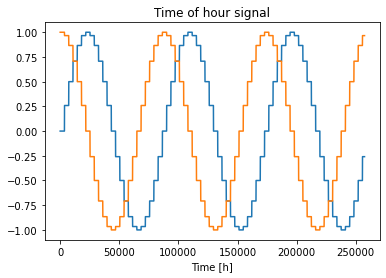

In [73]:
plt.plot(np.array(training['hour_sin']))
plt.plot(np.array(training['hour_cos']))
plt.xlabel('Time [h]')
plt.title('Time of hour signal')

Text(0.5, 1.0, 'Time of minute signal')

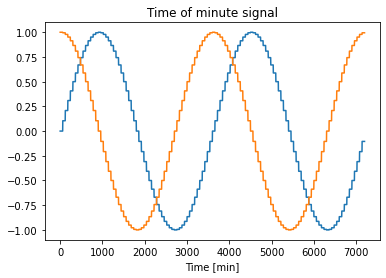

In [78]:
plt.plot(np.array(training['min_sin'])[:7200])
plt.plot(np.array(training['min_cos'])[:7200])
plt.xlabel('Time [min]')
plt.title('Time of minute signal')

Text(0.5, 1.0, 'Time of minute signal')

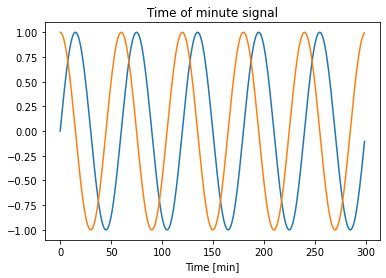

In [76]:
plt.plot(np.array(training['sec_sin'])[:300])
plt.plot(np.array(training['sec_cos'])[:300])
plt.xlabel('Time [min]')
plt.title('Time of minute signal')

In [79]:
training.tail()

datetime  oxygen_set_value  primary_air_volume  \
257395 2021-12-22 23:29:55              25.0          72750.4453   
257396 2021-12-22 23:29:56              25.0          72642.5703   
257397 2021-12-22 23:29:57              25.0          72248.2109   
257398 2021-12-22 23:29:58              25.0          72480.4453   
257399 2021-12-22 23:29:59              25.0          72773.5469   

        ejector_automatic_switching_signal  grate_automatic_switching_signal  \
257395                               False                             False   
257396                               False                             False   
257397                               False                             False   
257398                               False                             False   
257399                               False                             False   

        grate_manual_command  main_steam_flow_set_value  \
257395                  50.0                       60.0   
257396                  50.0                       60.0   
257397                  50.0                       60.0   
257398                  50.0                       60.0   
257399                  50.0                       60.0   

        ejector_manual_command  ejector_automatic_command  nox_content  ...  \
257395                    40.0                       70.0     111.6481  ...   
257396                    40.0                       70.0     111.5926  ...   
257397                    40.0                       70.0     111.7037  ...   
257398                    40.0                       70.0     111.5555  ...   
257399                    40.0                       70.0     111.5555  ...   

        main_steam_flow  mod  hod  sod  hour_sin  hour_cos   min_sin  \
257395          57.7807   29   23   55 -0.258819  0.965926  0.104528   
257396          57.7987   29   23   56 -0.258819  0.965926  0.104528   
257397          57.7698   29   23   57 -0.258819  0.965926  0.104528   
257398          57.7407   29   23   58 -0.258819  0.965926  0.104528   
257399          58.0246   29   23   59 -0.258819  0.965926  0.104528   

         min_cos   sec_sin   sec_cos  
257395 -0.994522 -0.500000  0.866025  
257396 -0.994522 -0.406737  0.913545  
257397 -0.994522 -0.309017  0.951057  
257398 -0.994522 -0.207912  0.978148  
257399 -0.994522 -0.104528  0.994522  

[5 rows x 32 columns]

In [80]:
training.to_csv('../training_processed.csv', index=False)

## 5.1 - sanity check numeric columns
- make sure no obvious errors
- pay attention to possible outliers

In [81]:
training[numerical_features + label].describe().T

count          mean           std  \
oxygen_set_value                257400.0      6.201312      2.359454   
primary_air_volume              257400.0  78918.179847  16030.208857   
grate_manual_command            257400.0     50.638377     10.599592   
main_steam_flow_set_value       257400.0     60.211729      3.651093   
ejector_manual_command          257400.0     65.254367     13.990871   
ejector_automatic_command       257400.0     65.671059     11.997791   
nox_content                     257400.0     64.268498     14.453635   
grate_actual_operation_command  257400.0     50.637682     10.598836   
secondary_air_control_door      257400.0     24.525675     17.042409   
hcl_content                     257400.0      6.750717      4.698065   
secondary_air_volume            257400.0   6255.647050   7525.221485   
water_flow                      257400.0     73.661845      6.538844   
so2_content                     257400.0     15.191679     21.910177   
drum_water_level                257400.0      4.995823      5.693213   
induced_fan_speed               257400.0     70.309593      6.356223   
co_content                      257400.0      3.006612     15.044441   
primary_damper                  257400.0     74.595113     10.529393   
main_steam_flow                 257400.0     58.041412      5.141179   

                                       min           25%          50%  \
oxygen_set_value                    2.8828      5.500000      5.50000   
primary_air_volume              19971.2715  70147.445300  77882.49220   
grate_manual_command               30.0000     40.000000     50.00000   
main_steam_flow_set_value          42.6552     60.000000     60.00000   
ejector_manual_command             30.0000     55.000000     60.00000   
ejector_automatic_command          40.0000     56.231900     61.53445   
nox_content                        20.2778     54.611100     62.77780   
grate_actual_operation_command     29.9998     40.000000     50.00000   
secondary_air_control_door          9.6852     19.650300     19.71060   
hcl_content                         0.4074      4.023100      5.73610   
secondary_air_volume               -0.0000   3354.102100   4062.01900   
water_flow                         46.8703     69.970475     73.57970   
so2_content                        -0.1458      3.277800      6.78470   
drum_water_level                  -27.9869      3.087775      4.95455   
induced_fan_speed                  42.9398     66.467600     69.75480   
co_content                         -0.4581      0.736100      1.34720   
primary_damper                     24.9977     70.553400     75.49070   
main_steam_flow                    42.5364     54.769575     58.09580   

                                         75%          max  
oxygen_set_value                    6.000000      25.0000  
primary_air_volume              91788.789100  122637.0469  
grate_manual_command               57.968600     100.0000  
main_steam_flow_set_value          62.000000      70.0361  
ejector_manual_command             74.727900     100.0002  
ejector_automatic_command          72.232775     100.0002  
nox_content                        71.722200     134.5370  
grate_actual_operation_command     57.972500     100.0000  
secondary_air_control_door         20.838000      89.9792  
hcl_content                         8.041700      58.0046  
secondary_air_volume             5196.152300   35791.0586  
water_flow                         77.542825     100.2972  
so2_content                        19.611100     299.6178  
drum_water_level                    6.994950      46.9223  
induced_fan_speed                  74.275500      91.2498  
co_content                          2.194400     300.2081  
primary_damper                     80.631900     100.0231  
main_steam_flow                    61.188500      79.2595

In [82]:
# outlier checking
def check_outlier(df, column_name):
    # retrieve statistics
    Q1 = df[column_name].quantile(.25)
    Q3 = df[column_name].quantile(.75)
    IQR = Q3 - Q1
    threshold = IQR * 1.5
    upper_boundary = Q3 + threshold
    lower_boundary = Q1 - threshold
    # log
    print(f"For {column_name} Q1:{Q1}, Q3:{Q3}, IQR:{IQR}, threshold:{threshold}, upper_boundary:{upper_boundary}, low_boundary:{lower_boundary}")
    # locating outlier
    df_below_lower_boundary = df.loc[df[column_name] <= lower_boundary]
    df_above_upper_boundary = df.loc[df[column_name] >= upper_boundary]
    
    print(f"Found {len(df_below_lower_boundary)} records below lower boundary and {len(df_above_upper_boundary)} records above upper boundary.")

In [83]:
check_outlier(training, 'main_steam_flow')

For main_steam_flow Q1:54.769574999999996, Q3:61.1885, IQR:6.4189250000000015, threshold:9.628387500000002, upper_boundary:70.8168875, low_boundary:45.141187499999994
Found 1822 records below lower boundary and 1045 records above upper boundary.


In [84]:
check_outlier(training, 'water_flow')

For water_flow Q1:69.970475, Q3:77.542825, IQR:7.57235, threshold:11.358525, upper_boundary:88.90135, low_boundary:58.61194999999999
Found 3448 records below lower boundary and 2965 records above upper boundary.


In [85]:
check_outlier(training, 'secondary_air_volume')

For secondary_air_volume Q1:3354.1021, Q3:5196.1523, IQR:1842.0501999999997, threshold:2763.0752999999995, upper_boundary:7959.227599999999, low_boundary:591.0268000000005
Found 37374 records below lower boundary and 40680 records above upper boundary.


In [86]:
(training['main_steam_flow_set_value'] - training['main_steam_flow']).describe()

count    257400.000000
mean          2.170318
std           4.689881
min         -19.259500
25%          -0.118200
50%           1.442050
75%           5.025000
max          20.785800
dtype: float64

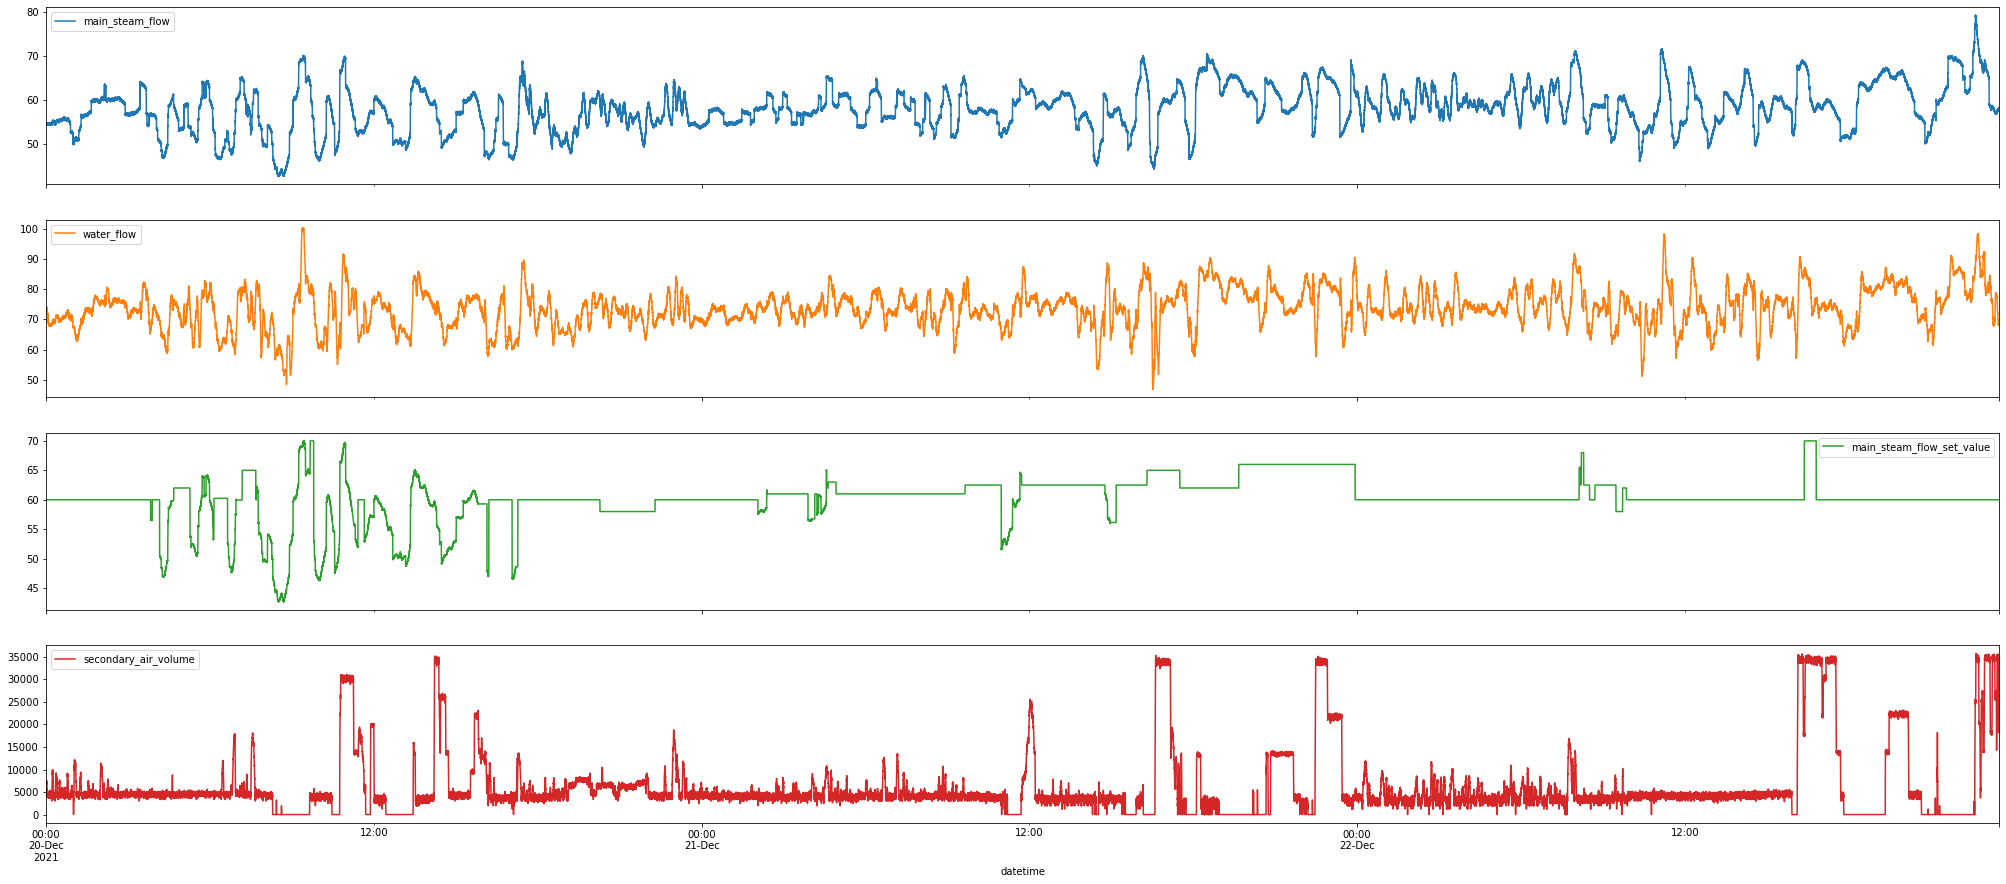

In [87]:
date_time = pd.to_datetime(training['datetime'], format='%Y-%m%d %H:%M:%S')
plot_cols = ['main_steam_flow', 'water_flow', 'main_steam_flow_set_value', 'secondary_air_volume']
plot_features = training[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(35, 15))

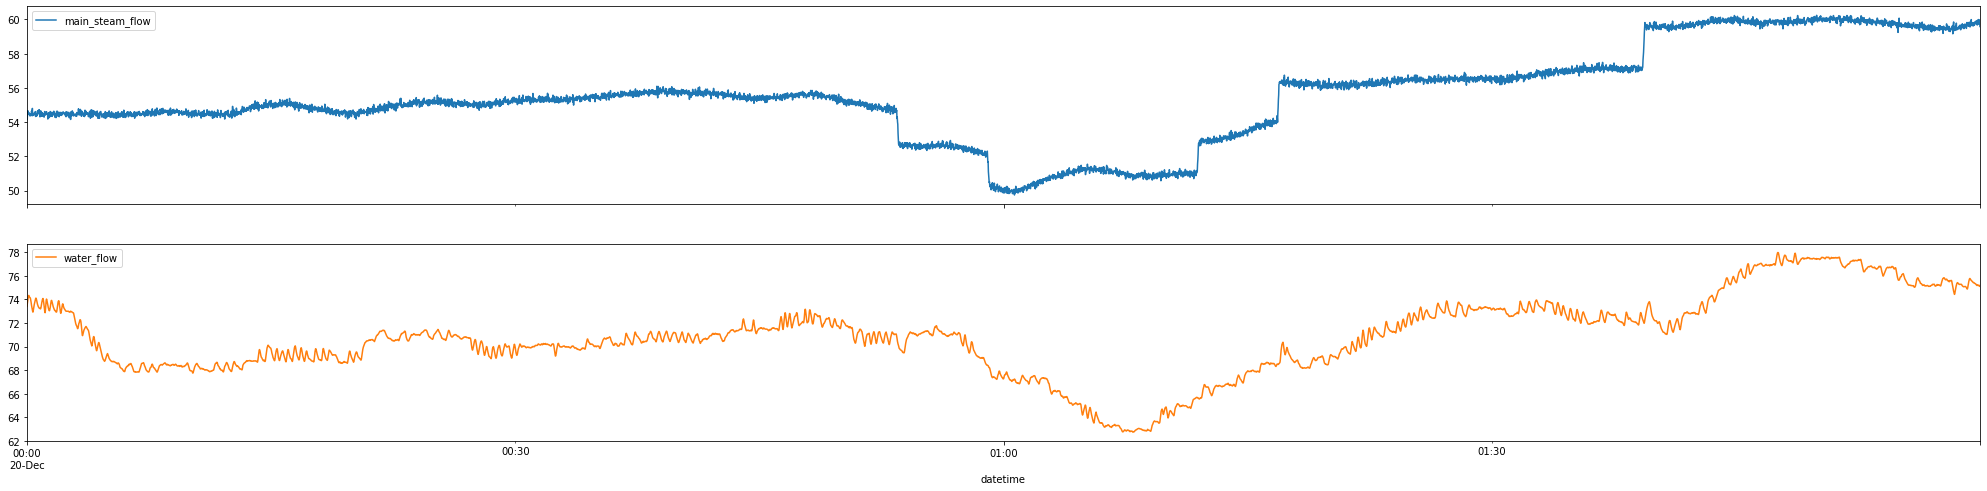

In [88]:
training_filtered = training.iloc[:7200]

date_time = pd.to_datetime(training_filtered['datetime'], format='%Y-%m%d %H:%M:%S')
plot_cols = ['main_steam_flow', 'water_flow']
plot_features = training_filtered[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(35, 8))

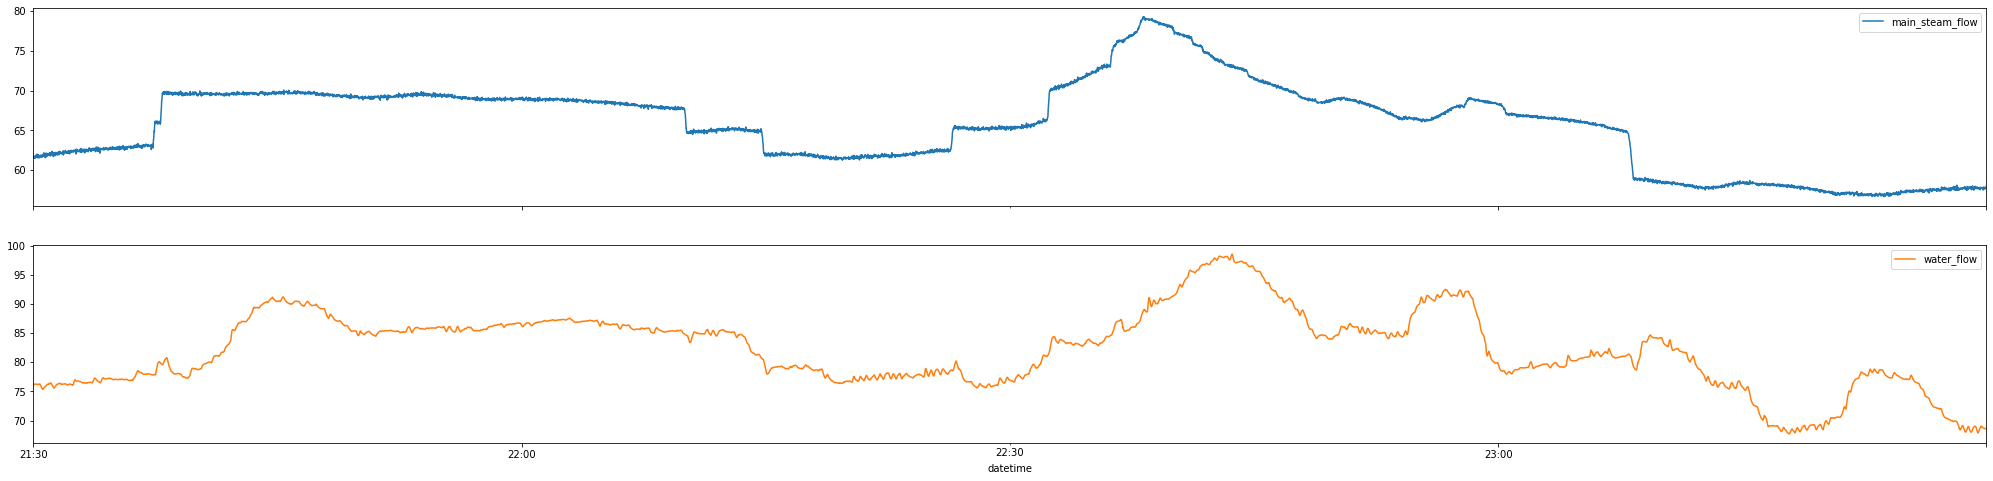

In [89]:
training_filtered = training.iloc[-7200:]

date_time = pd.to_datetime(training_filtered['datetime'], format='%Y-%m%d %H:%M:%S')
plot_cols = ['main_steam_flow', 'water_flow']
plot_features = training_filtered[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(35, 8))

In [90]:
training.head()

datetime  oxygen_set_value  primary_air_volume  \
0 2021-12-20 00:00:00               5.5          72919.6563   
1 2021-12-20 00:00:01               5.5          73034.8047   
2 2021-12-20 00:00:02               5.5          73111.4609   
3 2021-12-20 00:00:03               5.5          73134.4375   
4 2021-12-20 00:00:04               5.5          73493.5625   

   ejector_automatic_switching_signal  grate_automatic_switching_signal  \
0                                True                              True   
1                                True                              True   
2                                True                              True   
3                                True                              True   
4                                True                              True   

   grate_manual_command  main_steam_flow_set_value  ejector_manual_command  \
0               43.9083                       60.0                 53.9083   
1               44.0000                       60.0                 54.0000   
2               44.0452                       60.0                 54.0452   
3               44.0575                       60.0                 54.0575   
4               44.0699                       60.0                 54.0699   

   ejector_automatic_command  nox_content  ...  main_steam_flow  mod  hod  \
0                    53.9094      57.4444  ...          54.3032    0    0   
1                    54.0353      57.3889  ...          54.1495    0    0   
2                    54.0476      57.5556  ...          54.4899    0    0   
3                    54.0600      57.5370  ...          54.6693    0    0   
4                    54.0724      57.3889  ...          54.5034    0    0   

   sod  hour_sin  hour_cos  min_sin  min_cos   sec_sin   sec_cos  
0    0       0.0       1.0      0.0      1.0  0.000000  1.000000  
1    1       0.0       1.0      0.0      1.0  0.104528  0.994522  
2    2       0.0       1.0      0.0      1.0  0.207912  0.978148  
3    3       0.0       1.0      0.0      1.0  0.309017  0.951057  
4    4       0.0       1.0      0.0      1.0  0.406737  0.913545  

[5 rows x 32 columns]

## 5.2 - check correaltion between features and labels

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'oxygen_set_value'),
  Text(1.5, 0, 'primary_air_volume'),
  Text(2.5, 0, 'grate_manual_command'),
  Text(3.5, 0, 'main_steam_flow_set_value'),
  Text(4.5, 0, 'ejector_manual_command'),
  Text(5.5, 0, 'ejector_automatic_command'),
  Text(6.5, 0, 'nox_content'),
  Text(7.5, 0, 'grate_actual_operation_command'),
  Text(8.5, 0, 'secondary_air_control_door'),
  Text(9.5, 0, 'hcl_content'),
  Text(10.5, 0, 'secondary_air_volume'),
  Text(11.5, 0, 'water_flow'),
  Text(12.5, 0, 'so2_content'),
  Text(13.5, 0, 'drum_water_level'),
  Text(14.5, 0, 'induced_fan_speed'),
  Text(15.5, 0, 'co_content'),
  Text(16.5, 0, 'primary_damper'),
  Text(17.5, 0, 'hour_sin'),
  Text(18.5, 0, 'hour_cos'),
  Text(19.5, 0, 'min_sin'),
  Text(20.5, 0, 'min_cos'),
  Text(21.5, 0, 'sec_sin'),
  Text(22.5, 0, 'sec_cos'),
  Text(23.5

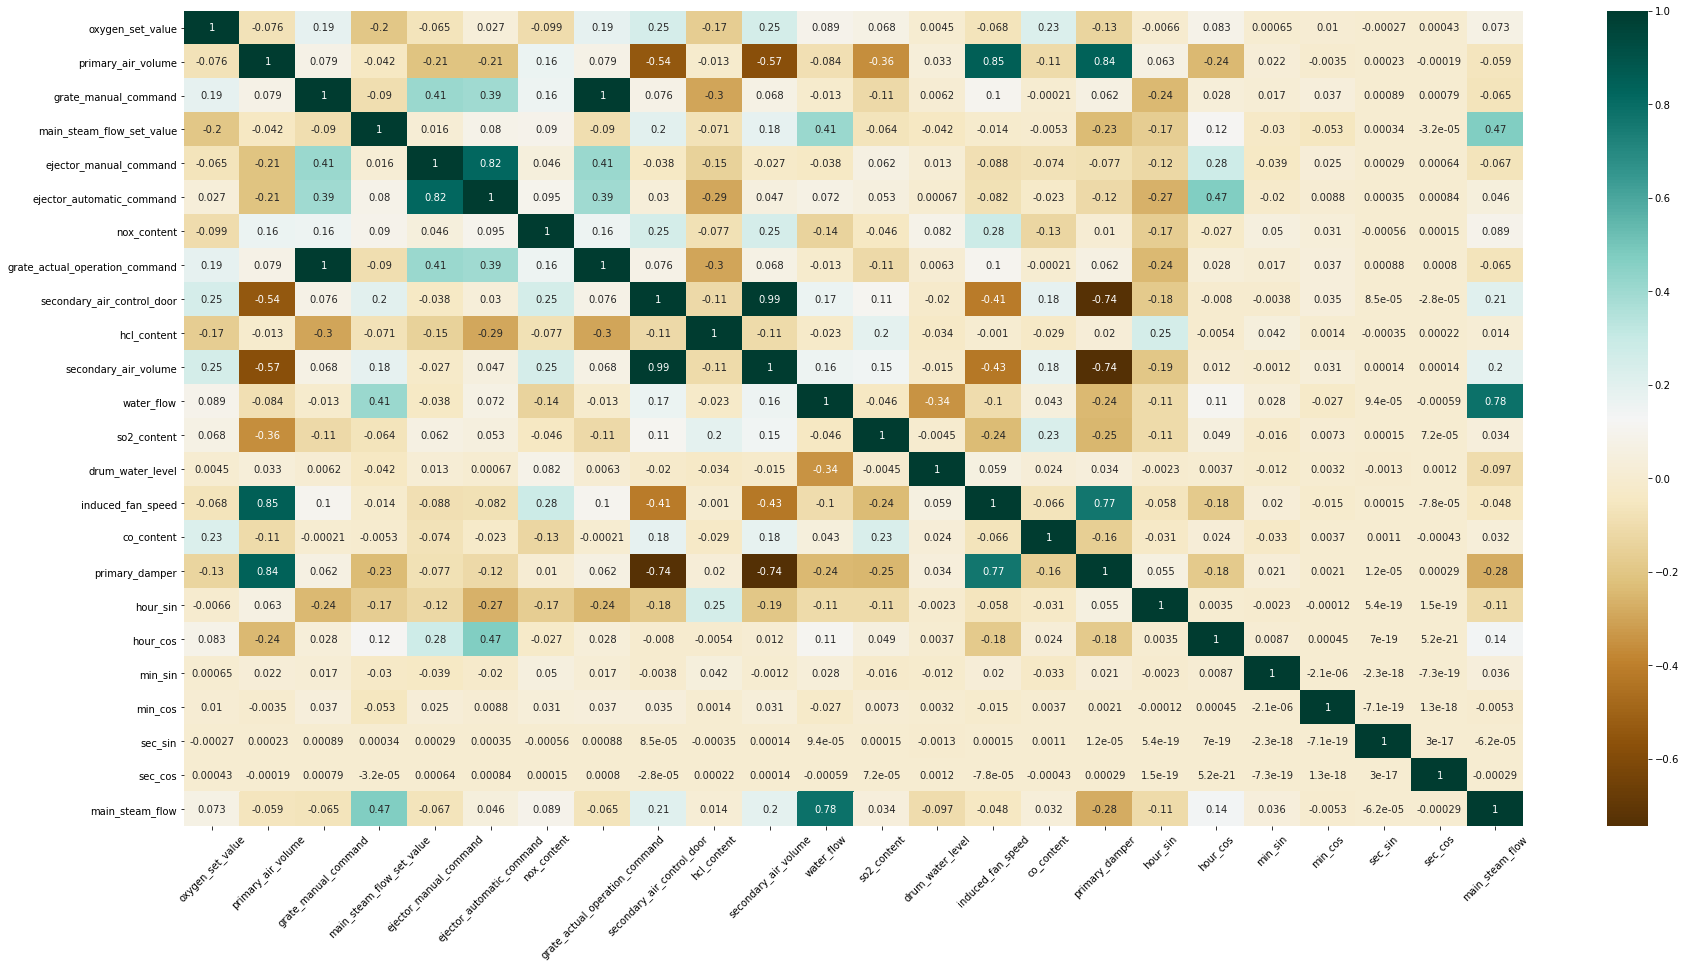

In [91]:
corr_df = training[numerical_features + time_series_features + label].corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr_df, cmap='BrBG', annot=True)
plt.xticks(rotation=45)

### ejector_automatic_switching_signal - True Vs False

<AxesSubplot:title={'center':'ejector_automatic_switching_signal - False'}, xlabel='main_steam_flow', ylabel='Count'>

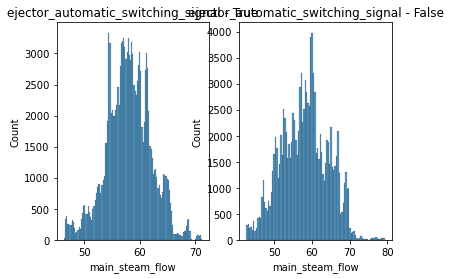

In [92]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("ejector_automatic_switching_signal - True")
axes[1].set_title("ejector_automatic_switching_signal - False")
sns.histplot(data=training.loc[training['ejector_automatic_switching_signal'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['ejector_automatic_switching_signal'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'grate_automatic_switching_signal - False'}, xlabel='main_steam_flow', ylabel='Count'>

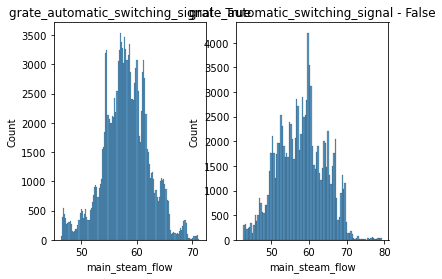

In [93]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("grate_automatic_switching_signal - True")
axes[1].set_title("grate_automatic_switching_signal - False")
sns.histplot(data=training.loc[training['grate_automatic_switching_signal'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['grate_automatic_switching_signal'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'pusher_on_or_off - False'}, xlabel='main_steam_flow', ylabel='Count'>

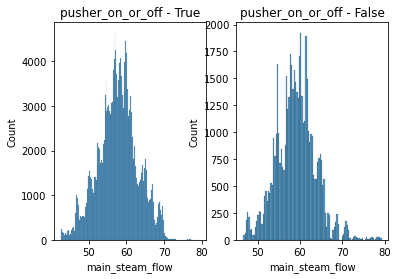

In [94]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("pusher_on_or_off - True")
axes[1].set_title("pusher_on_or_off - False")
sns.histplot(data=training.loc[training['pusher_on_or_off'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['pusher_on_or_off'] == False], x="main_steam_flow", ax=axes[1])

<AxesSubplot:title={'center':'grate_on_or_off - False'}, xlabel='main_steam_flow', ylabel='Count'>

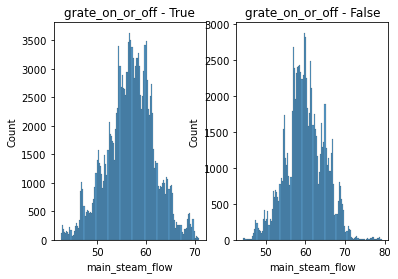

In [160]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("grate_on_or_off - True")
axes[1].set_title("grate_on_or_off - False")
sns.histplot(data=training.loc[training['grate_on_or_off'] == True], x="main_steam_flow", ax=axes[0])
sns.histplot(data=training.loc[training['grate_on_or_off'] == False], x="main_steam_flow", ax=axes[1])

## 6 - check time serise features

In [161]:
# sorting make sure data is in order
training.sort_values(by=['datetime'], ascending=True, inplace=True)
training[['datetime']].head()

datetime
0 2021-12-20 00:00:00
1 2021-12-20 00:00:01
2 2021-12-20 00:00:02
3 2021-12-20 00:00:03
4 2021-12-20 00:00:04

In [162]:
training[['datetime']].tail()

datetime
257395 2021-12-22 23:29:55
257396 2021-12-22 23:29:56
257397 2021-12-22 23:29:57
257398 2021-12-22 23:29:58
257399 2021-12-22 23:29:59

In [163]:
ts_df = training[['datetime', 'main_steam_flow']]

ts_df['diff1'] = ts_df['main_steam_flow'].diff(1)

ts_df['diff2'] = ts_df['diff1'].diff(1)

ts_df

<ipython-input-163-f2b2bead0b86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['diff1'] = ts_df['main_steam_flow'].diff(1)
<ipython-input-163-f2b2bead0b86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['diff2'] = ts_df['diff1'].diff(1)


datetime  main_steam_flow   diff1   diff2
0      2021-12-20 00:00:00          54.3032     NaN     NaN
1      2021-12-20 00:00:01          54.1495 -0.1537     NaN
2      2021-12-20 00:00:02          54.4899  0.3404  0.4941
3      2021-12-20 00:00:03          54.6693  0.1794 -0.1610
4      2021-12-20 00:00:04          54.5034 -0.1659 -0.3453
...                    ...              ...     ...     ...
257395 2021-12-22 23:29:55          57.7807  0.1015  0.1195
257396 2021-12-22 23:29:56          57.7987  0.0180 -0.0835
257397 2021-12-22 23:29:57          57.7698 -0.0289 -0.0469
257398 2021-12-22 23:29:58          57.7407 -0.0291 -0.0002
257399 2021-12-22 23:29:59          58.0246  0.2839  0.3130

[257400 rows x 4 columns]

## 6.1 stationary test

In [164]:
# using statsmodel do AD test
result = adfuller(ts_df.main_steam_flow.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -8.446153446969454
n_lags: 1.710661703210368e-13
p-value: 1.710661703210368e-13
Critial Values:
   1%, -3.430375414049181
Critial Values:
   5%, -2.861551232687254
Critial Values:
   10%, -2.5667759787531788


In [165]:
# using arch.unitroot to AD test
adf = ADF(ts_df.main_steam_flow.dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.446
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [166]:
# using arch.unitroot to AD test
adf = ADF(ts_df.diff1.dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -43.722
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [167]:
# using arch.unitroot to AD test
adf = ADF(ts_df.diff2.dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -90.740
P-value                         0.000
Lags                               86
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 6.2 white noise test

In [168]:
ljungbox_result = acorr_ljungbox(ts_df.main_steam_flow.dropna(), lags=[i for i in range(1, 12)])
ljungbox_result

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 257118.70308145,  514202.79216908,  771238.97436734,
        1028214.73580978, 1285117.8267485 , 1541937.96195195,
        1798663.69975336, 2055286.21387465, 2311801.58060748,
        2568201.55136839, 2824482.15667265]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [169]:
ljungbox_result = acorr_ljungbox(ts_df.diff1.dropna(), lags=[i for i in range(1, 12)])
ljungbox_result

(array([49435.00849544, 49578.43813771, 49704.82055291, 49824.11682665,
        49908.85797363, 50013.99316672, 50076.53344897, 50089.14581227,
        50143.86500696, 50156.41612587, 50182.23741787]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [170]:
ljungbox_result = acorr_ljungbox(ts_df.diff2.dropna(), lags=[i for i in range(1, 12)])
ljungbox_result

(array([112312.40579385, 118989.64931981, 118989.67053798, 118989.9063969 ,
        118990.82851692, 118992.21872914, 118992.71070777, 119000.84997082,
        119008.00861124, 119011.52080978, 119013.11705785]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## 6.3 seasonality test

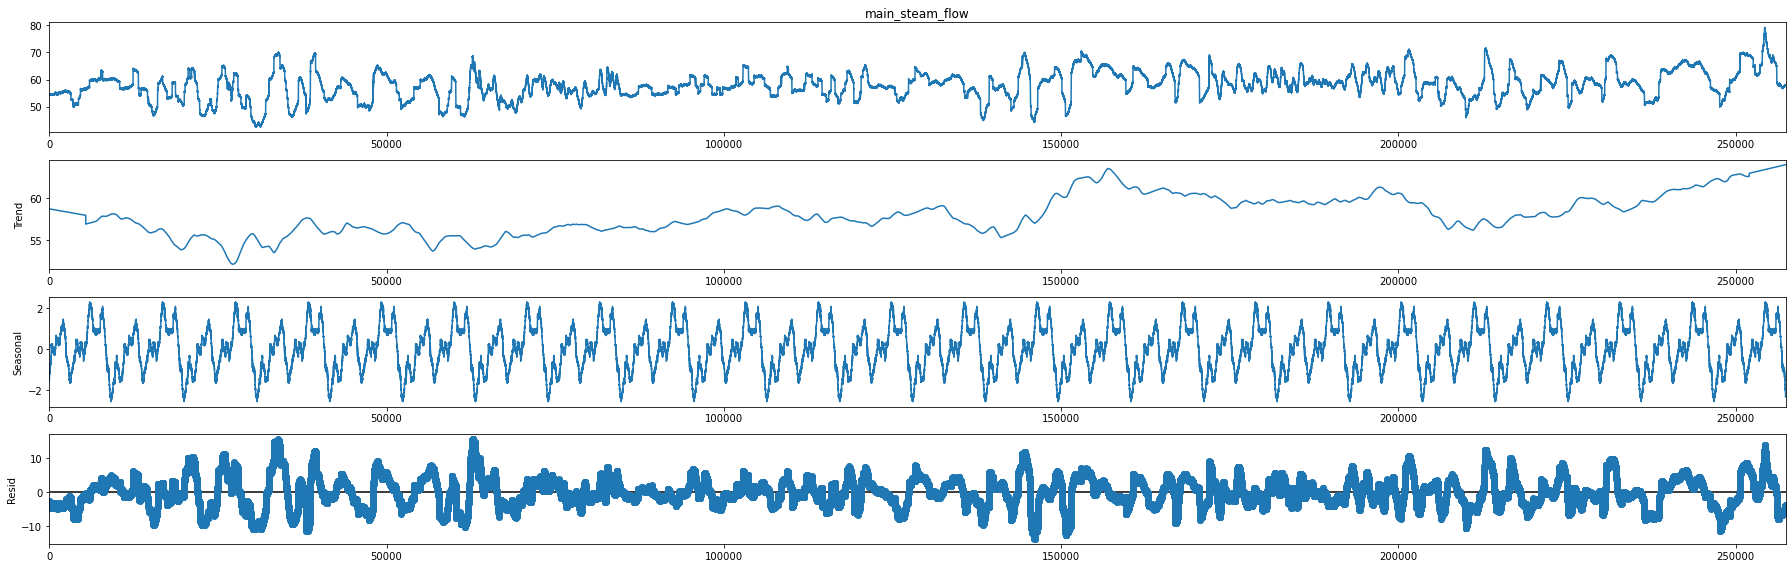

In [171]:
#model='additive'代表是加法模式，
#extrapolate_trend='freq'表示trend 、resid频率会从最近点开始，并且会对最近点的缺失值进行填充
#更多参数设置请参考官方文档：https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
decomposition = sm.tsa.seasonal_decompose(training.main_steam_flow.dropna(), model='additive', extrapolate_trend='freq', period=3600 * 3)  
plt.rc('figure',figsize=(25, 8))
fig = decomposition.plot()
plt.show()

## 6.4 ACF vs PACF

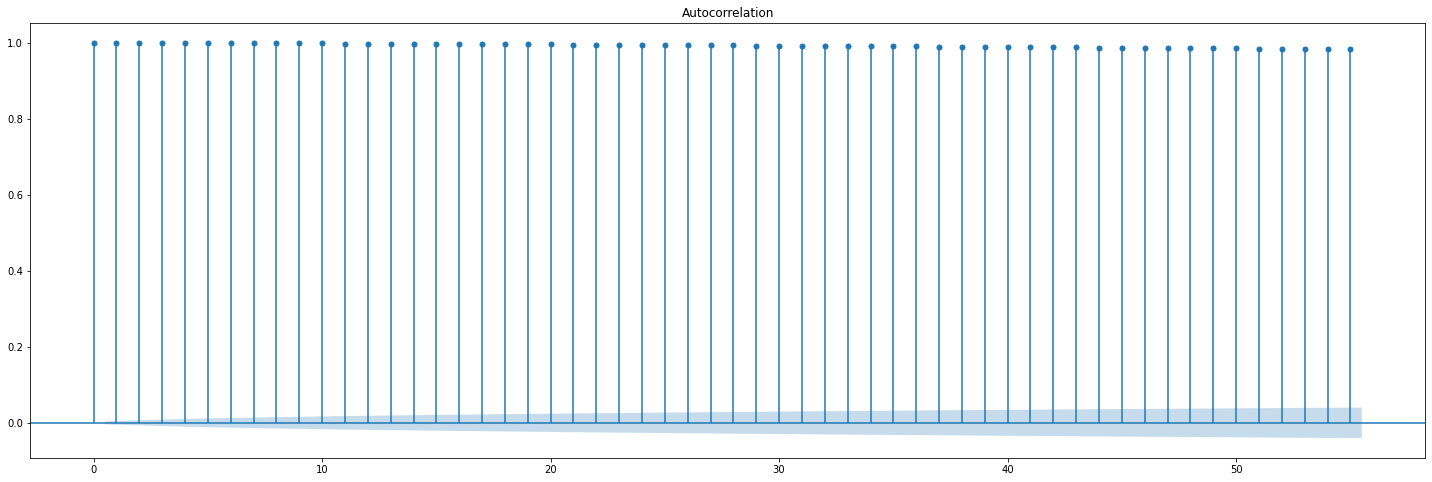

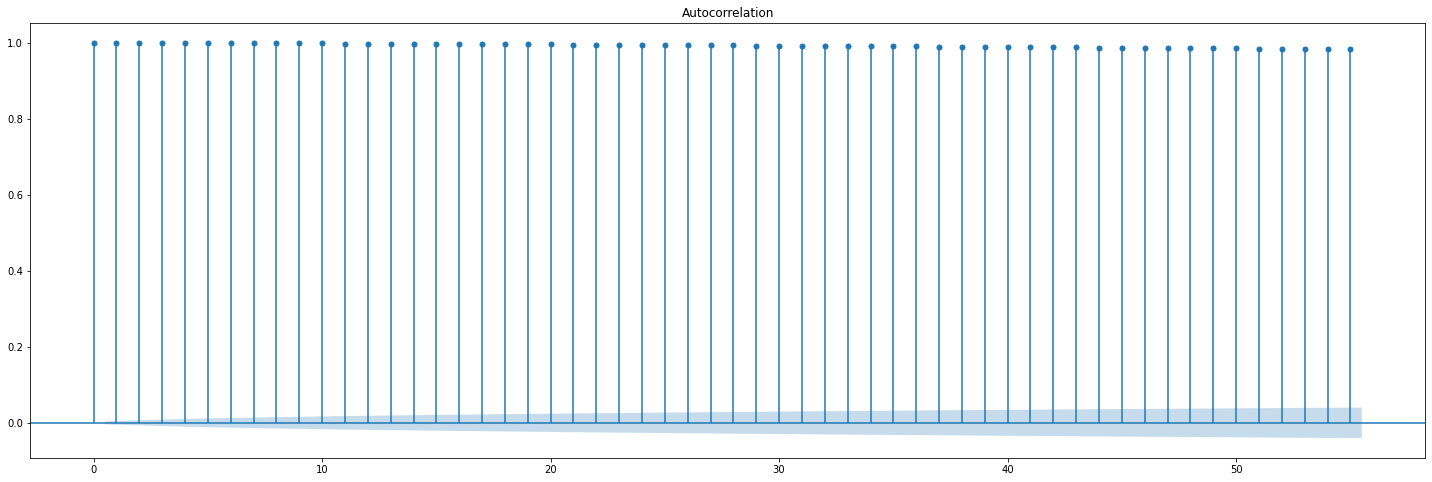

In [172]:
# plot ACF and PACF
plot_acf(ts_df.main_steam_flow.dropna())

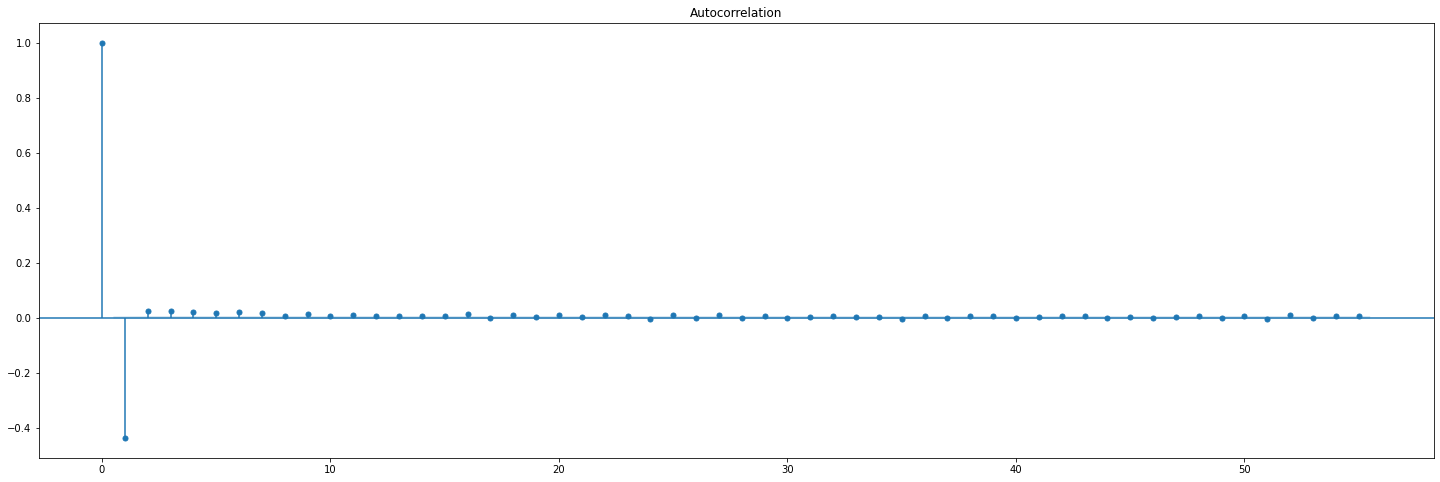

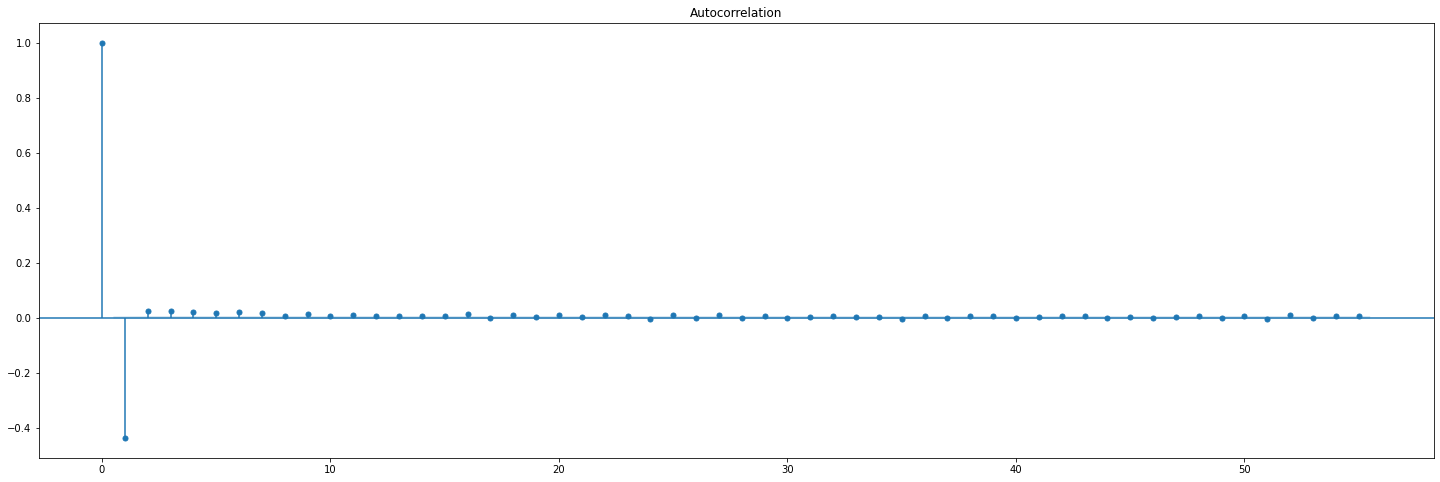

In [173]:
plot_acf(ts_df.diff1.dropna())

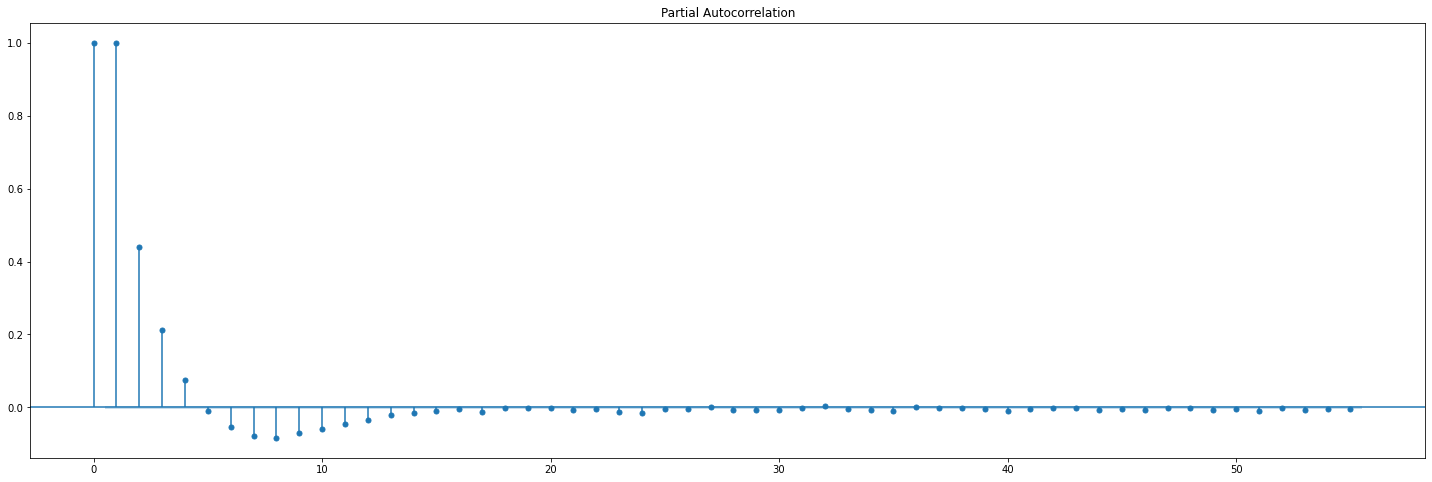

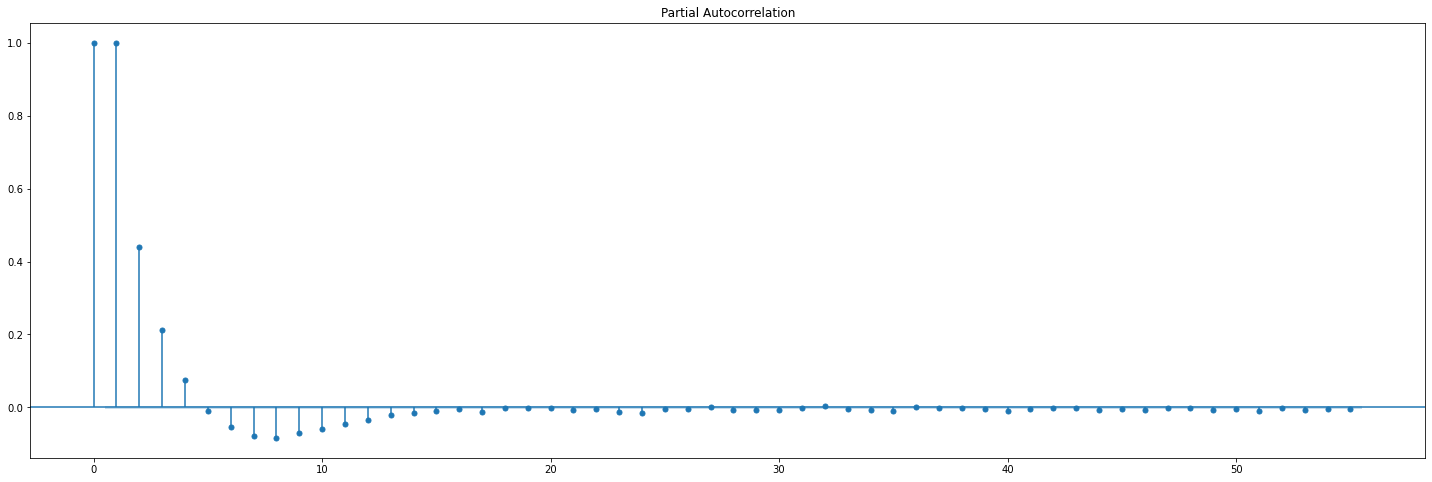

In [174]:
plot_pacf(ts_df.main_steam_flow.dropna())

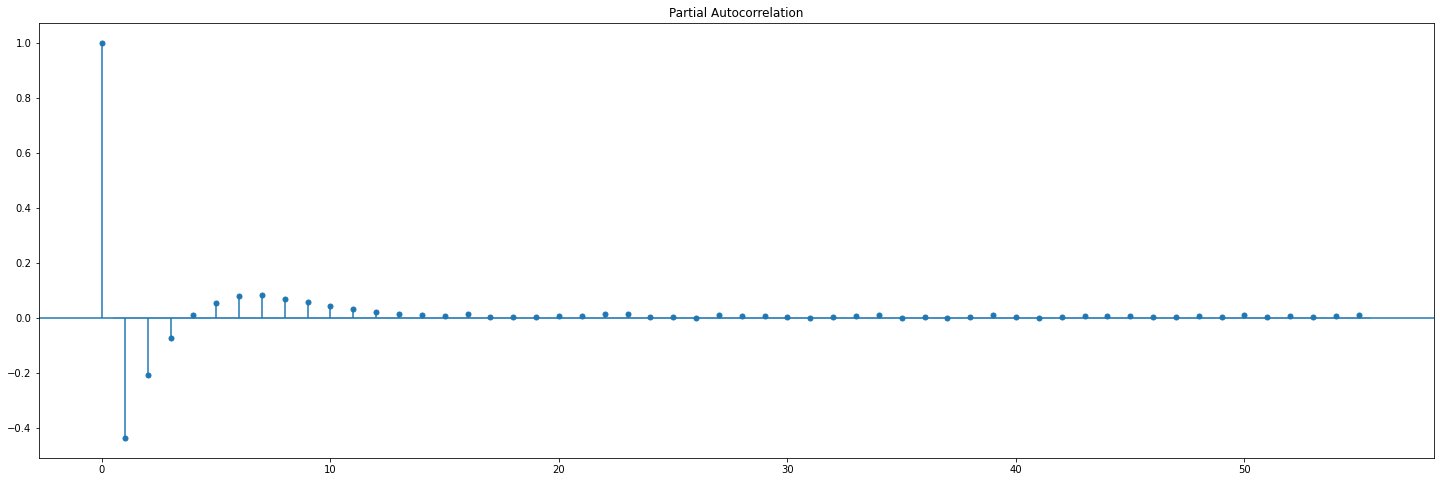

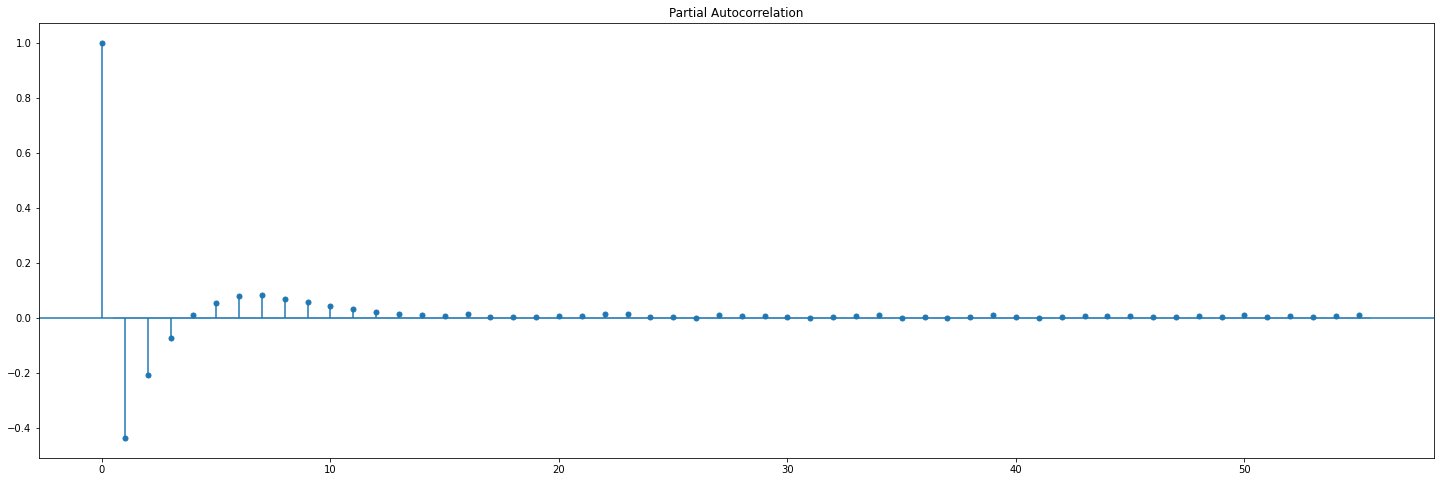

In [175]:
plot_pacf(ts_df.diff1.dropna())

In [176]:
auto_corr = training.sort_values(by=['datetime'], ascending=True)
auto_corr = auto_corr[['datetime', 'main_steam_flow']]
auto_corr = auto_corr.rename(columns={'main_steam_flow':'t0'})

for i in range(1, 301):
    auto_corr[f't{str(i)}'] = auto_corr['t0'].shift(i)
    
    
auto_corr.dropna(inplace=True)
auto_corr.drop(columns=['datetime'], inplace=True)

auto_corr = auto_corr.corr()

auto_corr.head()

t0        t1        t2        t3        t4        t5        t6  \
t0  1.000000  0.999449  0.999381  0.999287  0.999168  0.999025  0.998863   
t1  0.999449  1.000000  0.999449  0.999381  0.999287  0.999168  0.999025   
t2  0.999381  0.999449  1.000000  0.999449  0.999381  0.999287  0.999168   
t3  0.999287  0.999381  0.999449  1.000000  0.999449  0.999381  0.999287   
t4  0.999168  0.999287  0.999381  0.999449  1.000000  0.999449  0.999381   

          t7        t8        t9  ...      t291      t292      t293      t294  \
t0  0.998678  0.998477  0.998267  ...  0.837040  0.836288  0.835532  0.834779   
t1  0.998863  0.998678  0.998477  ...  0.837793  0.837040  0.836288  0.835532   
t2  0.999025  0.998863  0.998678  ...  0.838545  0.837793  0.837041  0.836288   
t3  0.999168  0.999025  0.998863  ...  0.839294  0.838545  0.837793  0.837041   
t4  0.999287  0.999168  0.999025  ...  0.840045  0.839294  0.838545  0.837794   

        t295      t296      t297      t298      t299      t300  
t0  0.834023  0.833271  0.832515  0.831759  0.831000  0.830246  
t1  0.834780  0.834023  0.833271  0.832515  0.831759  0.831000  
t2  0.835533  0.834780  0.834024  0.833271  0.832515  0.831760  
t3  0.836289  0.835533  0.834780  0.834024  0.833272  0.832516  
t4  0.837041  0.836289  0.835533  0.834781  0.834024  0.833272  

[5 rows x 301 columns]

(array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
         27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
         54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
         81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
        108.5, 111.5, 114.5, 117.5, 120.5, 123.5, 126.5, 129.5, 132.5,
        135.5, 138.5, 141.5, 144.5, 147.5, 150.5, 153.5, 156.5, 159.5,
        162.5, 165.5, 168.5, 171.5, 174.5, 177.5, 180.5, 183.5, 186.5,
        189.5, 192.5, 195.5, 198.5, 201.5, 204.5, 207.5, 210.5, 213.5,
        216.5, 219.5, 222.5, 225.5, 228.5, 231.5, 234.5, 237.5, 240.5,
        243.5, 246.5, 249.5, 252.5, 255.5, 258.5, 261.5, 264.5, 267.5,
        270.5, 273.5, 276.5, 279.5, 282.5, 285.5, 288.5, 291.5, 294.5,
        297.5, 300.5]),
 [Text(0.5, 0, 't0'),
  Text(3.5, 0, 't3'),
  Text(6.5, 0, 't6'),
  Text(9.5, 0, 't9'),
  Text(12.5, 0, 't12'),
  Text(15.5, 0, 't15'),
  Text(18.5, 0, 't18'),
  Text(21.5, 0, 't21'),
  Text(24.5

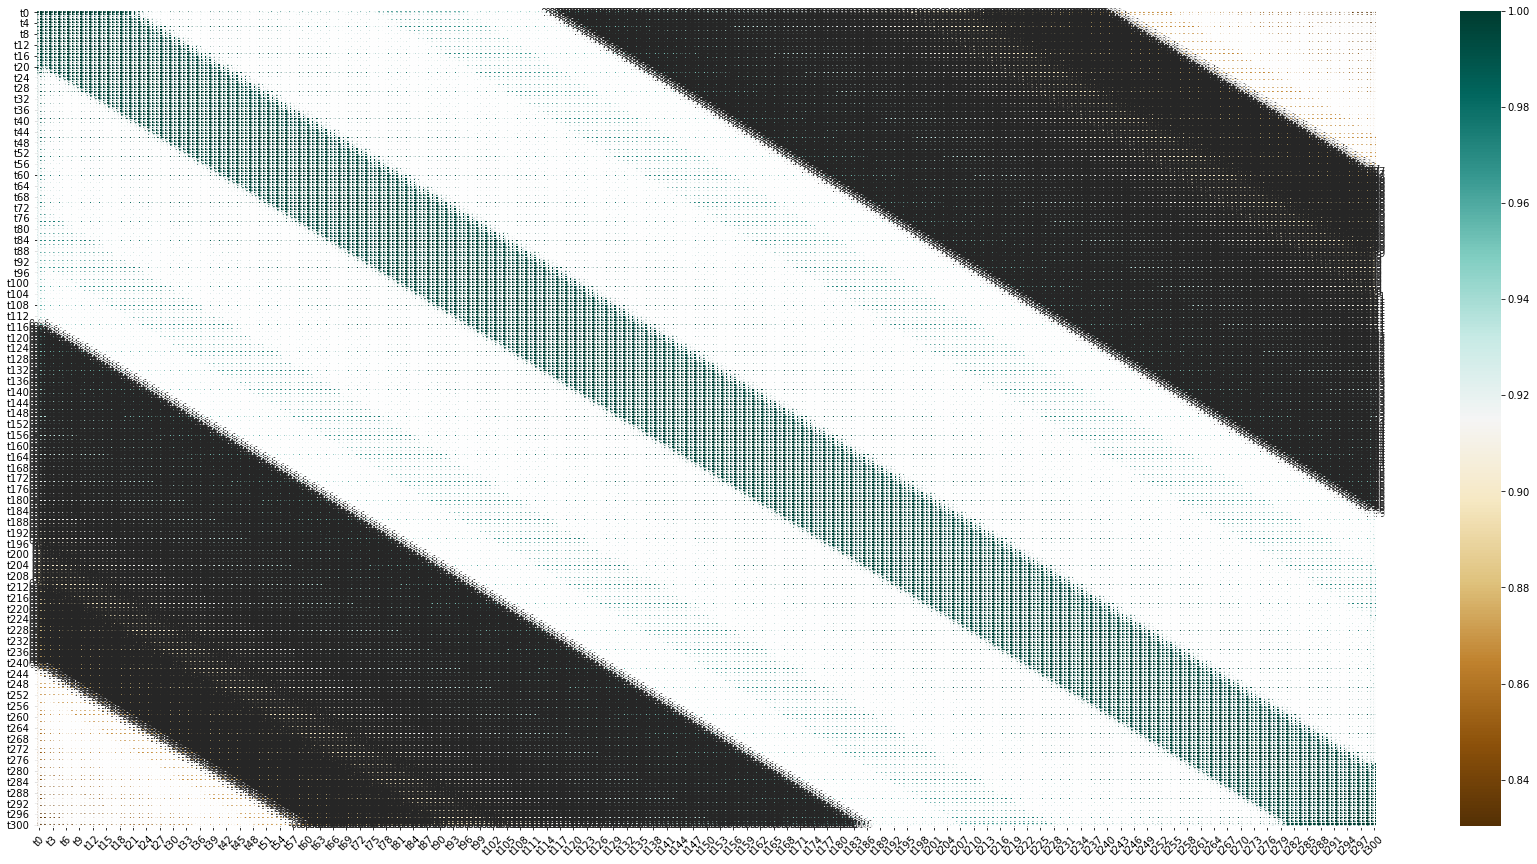

In [177]:
plt.figure(figsize=(30, 15))
sns.heatmap(auto_corr, cmap='BrBG', annot=True)
plt.xticks(rotation=45)

(array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
         27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
         54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
         81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
        108.5, 111.5, 114.5, 117.5, 120.5, 123.5, 126.5, 129.5, 132.5,
        135.5, 138.5, 141.5, 144.5, 147.5, 150.5, 153.5, 156.5, 159.5,
        162.5, 165.5, 168.5, 171.5, 174.5, 177.5, 180.5, 183.5, 186.5,
        189.5, 192.5, 195.5, 198.5, 201.5, 204.5, 207.5, 210.5, 213.5,
        216.5, 219.5, 222.5, 225.5, 228.5, 231.5, 234.5, 237.5, 240.5,
        243.5, 246.5, 249.5, 252.5, 255.5, 258.5, 261.5, 264.5, 267.5,
        270.5, 273.5, 276.5, 279.5, 282.5, 285.5, 288.5, 291.5, 294.5,
        297.5, 300.5]),
 [Text(0.5, 0, 't0'),
  Text(3.5, 0, 't3'),
  Text(6.5, 0, 't6'),
  Text(9.5, 0, 't9'),
  Text(12.5, 0, 't12'),
  Text(15.5, 0, 't15'),
  Text(18.5, 0, 't18'),
  Text(21.5, 0, 't21'),
  Text(24.5

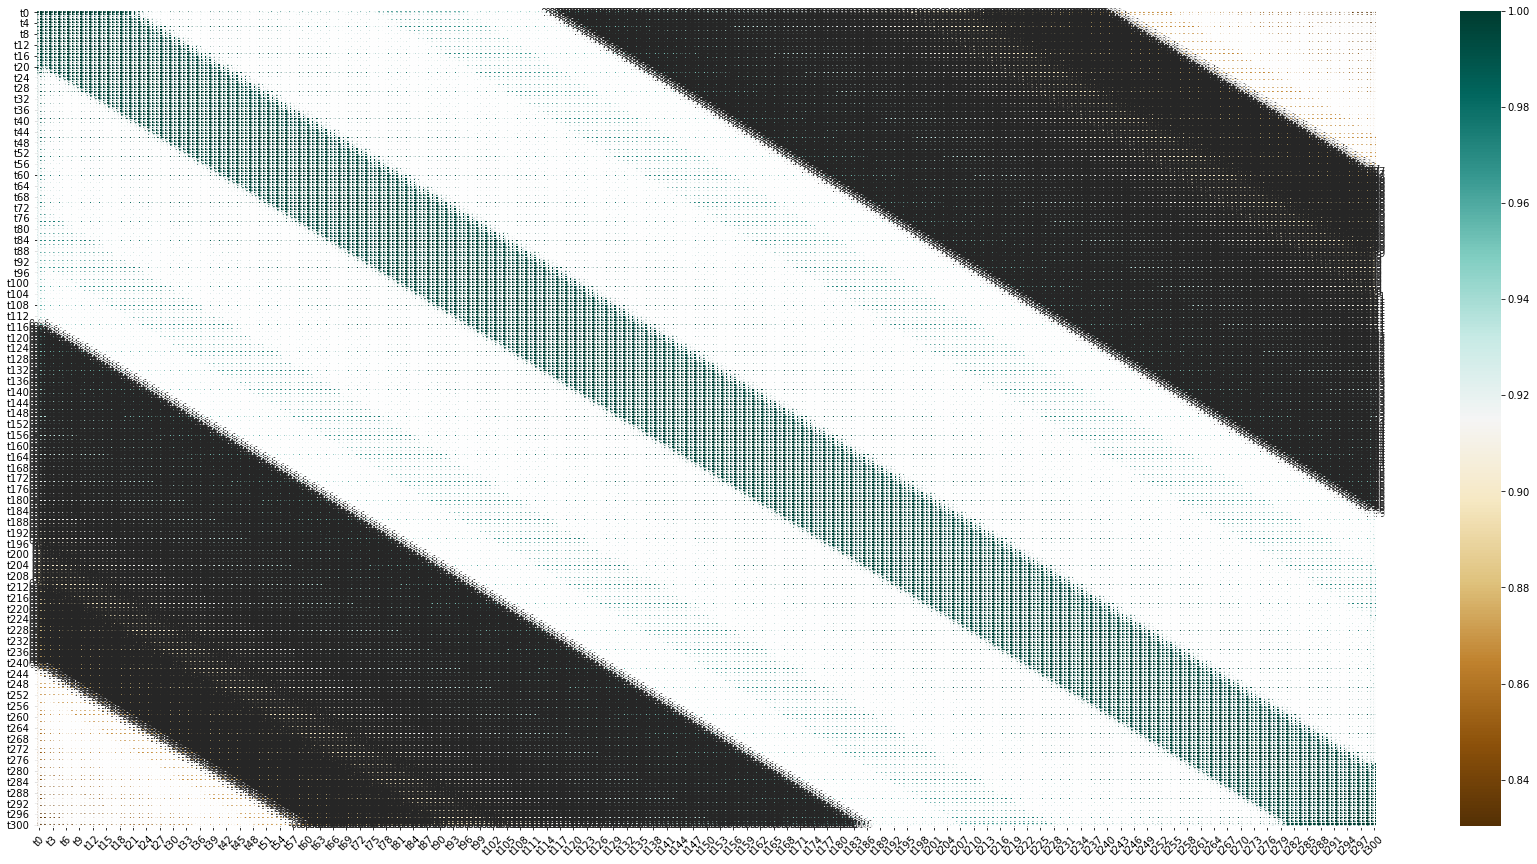

In [178]:
plt.figure(figsize=(30, 15))
sns.heatmap(auto_corr, cmap='BrBG', annot=True)
plt.xticks(rotation=45)

In [179]:
auto_corr = training.sort_values(by=['datetime'], ascending=True)
auto_corr = auto_corr[['datetime', 'main_steam_flow']]
auto_corr = auto_corr.rename(columns={'main_steam_flow':'t0'})

for i in range(300, 601):
    auto_corr[f't{str(i)}'] = auto_corr['t0'].shift(i)
    
    
auto_corr.dropna(inplace=True)
auto_corr.drop(columns=['datetime'], inplace=True)

auto_corr = auto_corr.corr()

auto_corr.head()

t0      t300      t301      t302      t303      t304      t305  \
t0    1.000000  0.830152  0.829393  0.828634  0.827876  0.827118  0.826358   
t300  0.830152  1.000000  0.999449  0.999381  0.999287  0.999168  0.999026   
t301  0.829393  0.999449  1.000000  0.999449  0.999381  0.999287  0.999168   
t302  0.828634  0.999381  0.999449  1.000000  0.999449  0.999381  0.999287   
t303  0.827876  0.999287  0.999381  0.999449  1.000000  0.999449  0.999381   

          t306      t307      t308  ...      t591      t592      t593  \
t0    0.825599  0.824839  0.824076  ...  0.597031  0.596223  0.595416   
t300  0.998864  0.998679  0.998477  ...  0.837044  0.836292  0.835536   
t301  0.999026  0.998864  0.998679  ...  0.837796  0.837044  0.836292   
t302  0.999168  0.999026  0.998864  ...  0.838549  0.837797  0.837044   
t303  0.999287  0.999168  0.999026  ...  0.839298  0.838549  0.837797   

          t594      t595      t596      t597      t598      t599      t600  
t0    0.594609  0.593799  0.592993  0.592184  0.591377  0.590571  0.589764  
t300  0.834783  0.834027  0.833274  0.832519  0.831763  0.831004  0.830249  
t301  0.835536  0.834783  0.834027  0.833275  0.832519  0.831763  0.831004  
t302  0.836292  0.835536  0.834784  0.834027  0.833275  0.832519  0.831763  
t303  0.837045  0.836292  0.835537  0.834784  0.834028  0.833275  0.832520  

[5 rows x 302 columns]

(array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
         27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
         54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
         81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
        108.5, 111.5, 114.5, 117.5, 120.5, 123.5, 126.5, 129.5, 132.5,
        135.5, 138.5, 141.5, 144.5, 147.5, 150.5, 153.5, 156.5, 159.5,
        162.5, 165.5, 168.5, 171.5, 174.5, 177.5, 180.5, 183.5, 186.5,
        189.5, 192.5, 195.5, 198.5, 201.5, 204.5, 207.5, 210.5, 213.5,
        216.5, 219.5, 222.5, 225.5, 228.5, 231.5, 234.5, 237.5, 240.5,
        243.5, 246.5, 249.5, 252.5, 255.5, 258.5, 261.5, 264.5, 267.5,
        270.5, 273.5, 276.5, 279.5, 282.5, 285.5, 288.5, 291.5, 294.5,
        297.5, 300.5]),
 [Text(0.5, 0, 't0'),
  Text(3.5, 0, 't302'),
  Text(6.5, 0, 't305'),
  Text(9.5, 0, 't308'),
  Text(12.5, 0, 't311'),
  Text(15.5, 0, 't314'),
  Text(18.5, 0, 't317'),
  Text(21.5, 0, 't320'),
 

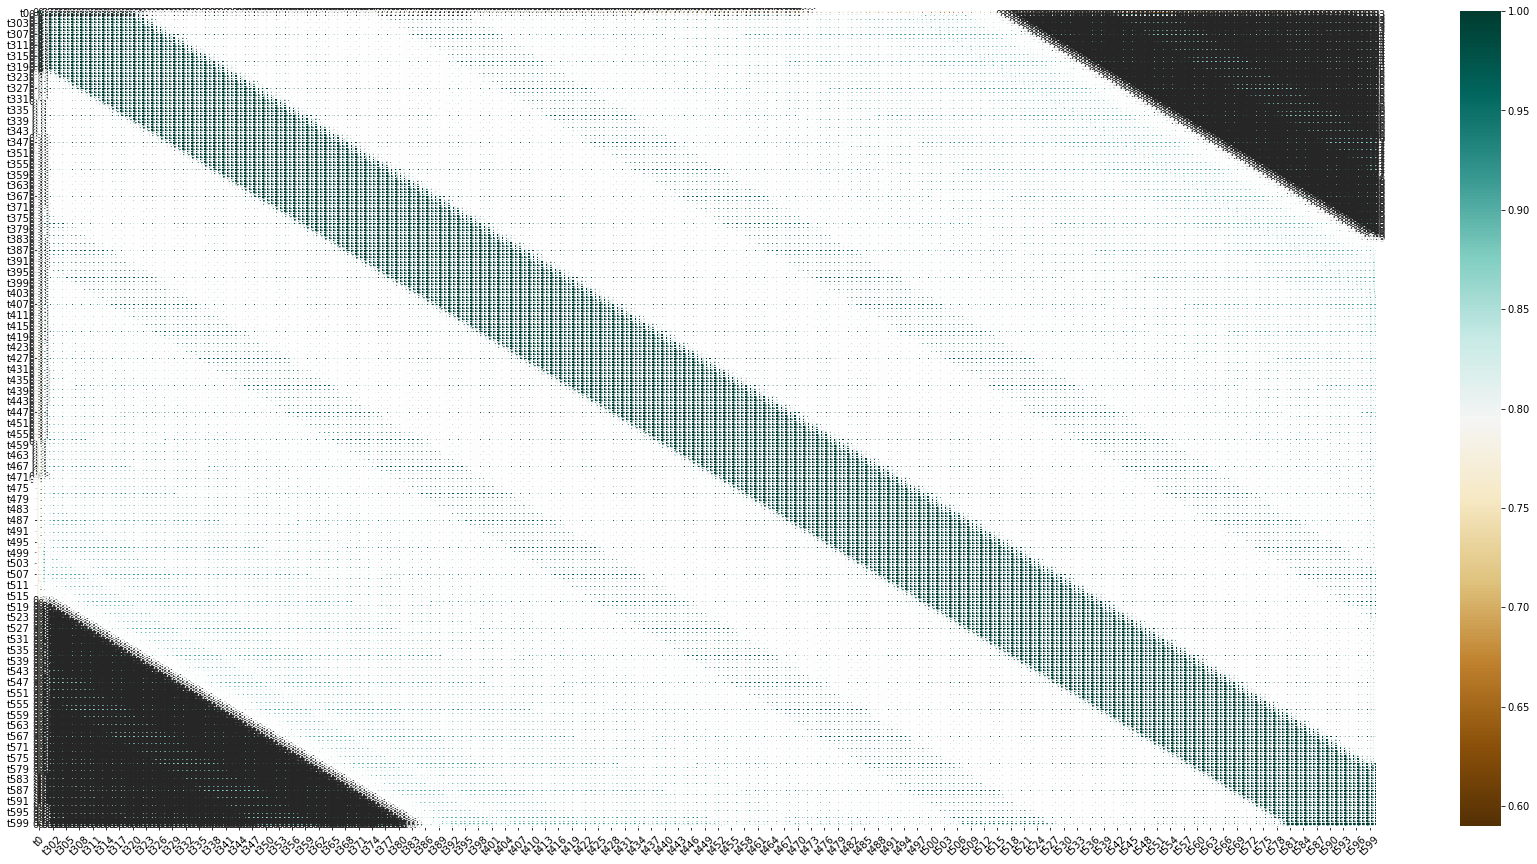

In [180]:
plt.figure(figsize=(30, 15))
sns.heatmap(auto_corr, cmap='BrBG', annot=True)
plt.xticks(rotation=45)

### conclusion
- p value for stationary test -> 1.7085745173668486e-13 less than 0.05 which means our data is stationary
- p value for white noise test -> 0 less than 0.05 shows data has correlation
- ACF and PACF show data don't have a repeat pattern